In [109]:
import numpy as np
import pandas as pd
# import numpy & pandas

# pip install jedi
# # for auto completion
# pd.options.display.max_columns=500
# pd.options.display.max_rows=200
# to set dataframes to show more cols & rows

import seaborn as sns   
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
# import statsmodels for statistical modelling
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importing VIF

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# import scikit-learn for machine learning

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import pylab
from pylab import plot, show
from pylab import legend, title, xlabel, ylabel
# importing matplotlib & seaborn for plotting graphs
import os
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE


## 1. Data Understanding and Preprocessing:

### 1.1 Load and inspect the dataset.

In [2]:
os.chdir(r"E:\Statistics\Exam")
df= pd.read_csv('data.csv')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [3]:
df.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6814                                      0.303510  ...   
6815                                      0.303520  ...   
6816                                      0.303512  ...   
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6814                     0.799927                    0.000466   
6815                     0.799748                    0.001959   
6816                     0.797778                    0.002840   
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6814             0.623620                0.604455   
6815             0.623931                0.598306   
6816             0.624156                0.610441   
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6814                             0.840359              0.279606   
6815                             0.840306              0.278132   
6816                             0.840138              0.275789   
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6814                             0.027064   
6815                             0.027009   
6816                             0.026791   
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6814                                           0.566193                   1   
6815                 

In [4]:
df.shape

(6819, 96)

In [5]:
df.info()
# getting info of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
pd.set_option('display.max_columns',400) # This will display maximum 400 columns.
pd.set_option('display.max_rows',400) #  # This will display maximum 400 Rows.

### 1.2 Handle missing values appropriately.

In [7]:
df.isnull().sum()
# There is no null values in dataset.

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

#### Rename the columns.

In [8]:
df.columns = df.columns.str.replace(' ', '')
# Removing the sapce between the name of columns.

In [9]:
df.columns = df.columns.str.replace('/', '_')

In [10]:
df.columns = df.columns.str.replace('-', '_')

In [11]:
df.columns = df.columns.str.replace('%', '_per')

In [12]:
df.columns = df.columns.str.replace('?', '')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Bankrupt                                           6819 non-null   int64  
 1   ROA(C)beforeinterestanddepreciationbeforeinterest  6819 non-null   float64
 2   ROA(A)beforeinterestand_peraftertax                6819 non-null   float64
 3   ROA(B)beforeinterestanddepreciationaftertax        6819 non-null   float64
 4   OperatingGrossMargin                               6819 non-null   float64
 5   RealizedSalesGrossMargin                           6819 non-null   float64
 6   OperatingProfitRate                                6819 non-null   float64
 7   Pre_taxnetInterestRate                             6819 non-null   float64
 8   After_taxnetInterestRate                           6819 non-null   float64
 9   Non_indu

In [14]:
df.duplicated()
#  There is no Duplicate value in data.

0       False
1       False
2       False
3       False
4       False
        ...  
6814    False
6815    False
6816    False
6817    False
6818    False
Length: 6819, dtype: bool

In [15]:
columns_to_drop = ['NetIncomeFlag','Liability_AssetsFlag','Bankrupt',]
newdf=df.drop(columns=columns_to_drop)
# Dropping the unwanted columns for analysis.

In [16]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 93 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ROA(C)beforeinterestanddepreciationbeforeinterest  6819 non-null   float64
 1   ROA(A)beforeinterestand_peraftertax                6819 non-null   float64
 2   ROA(B)beforeinterestanddepreciationaftertax        6819 non-null   float64
 3   OperatingGrossMargin                               6819 non-null   float64
 4   RealizedSalesGrossMargin                           6819 non-null   float64
 5   OperatingProfitRate                                6819 non-null   float64
 6   Pre_taxnetInterestRate                             6819 non-null   float64
 7   After_taxnetInterestRate                           6819 non-null   float64
 8   Non_industryincomeandexpenditure_revenue           6819 non-null   float64
 9   Continuo

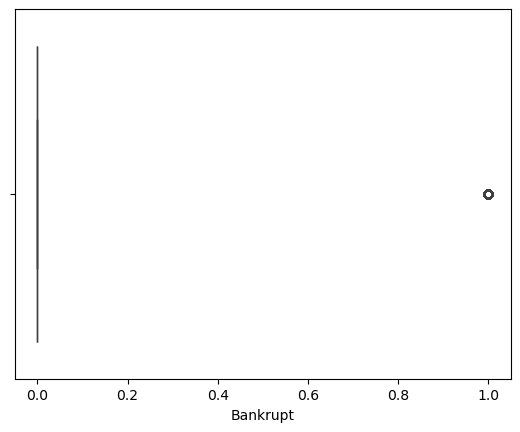

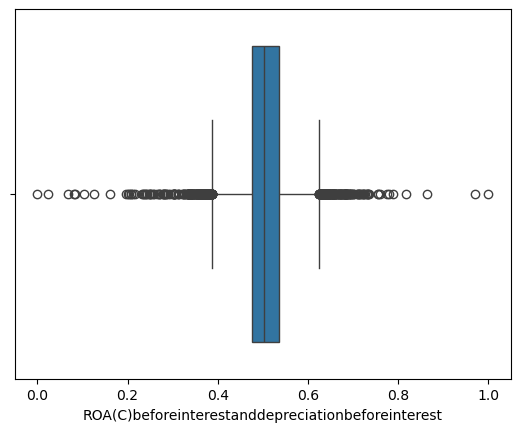

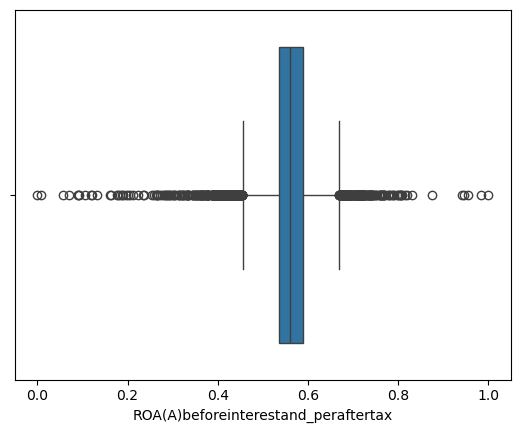

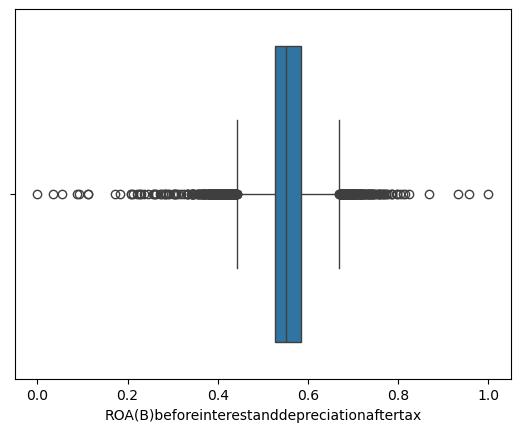

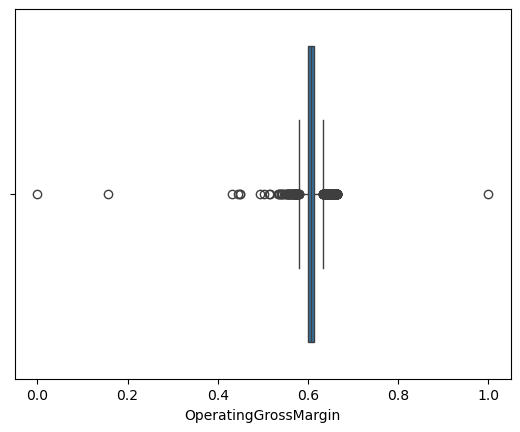

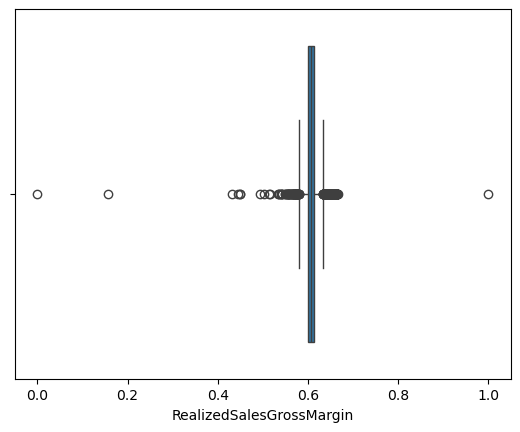

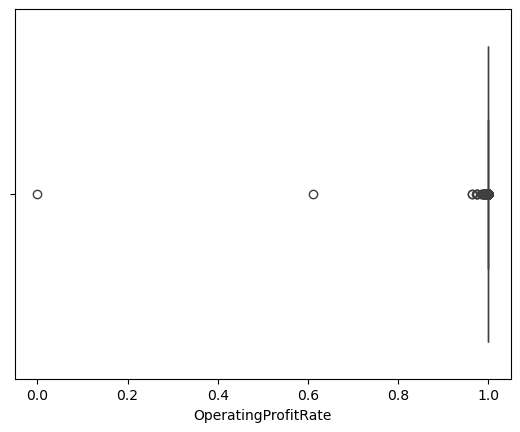

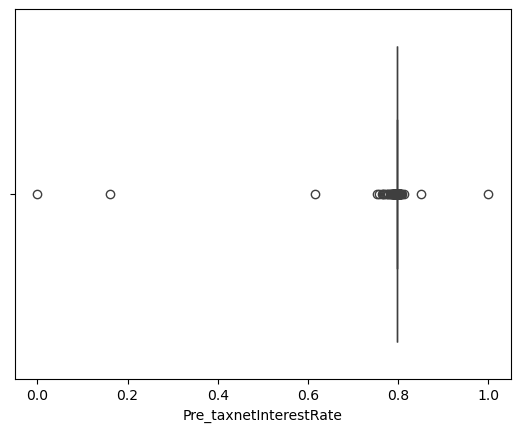

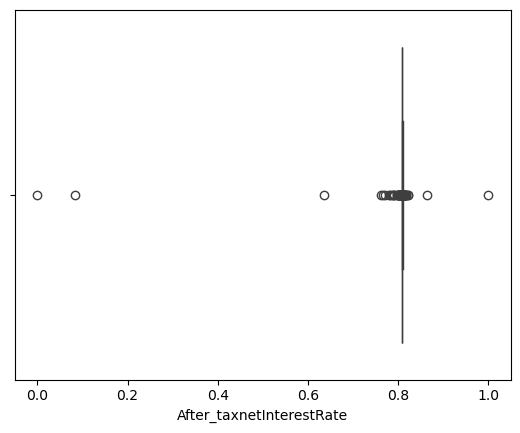

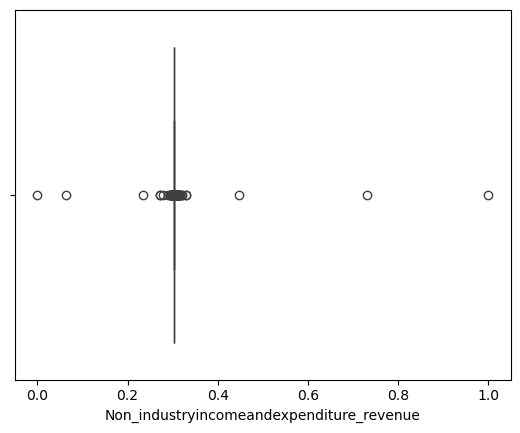

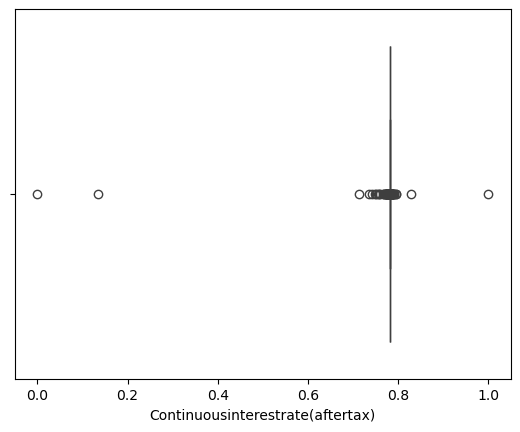

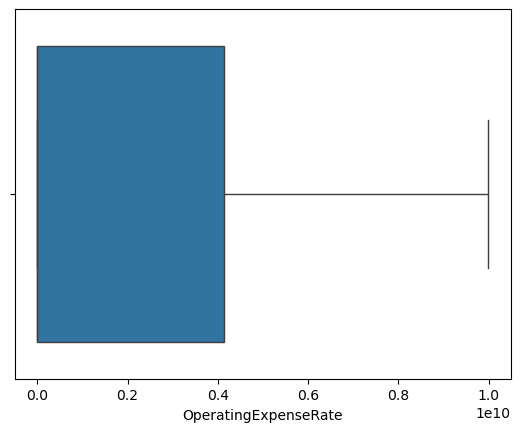

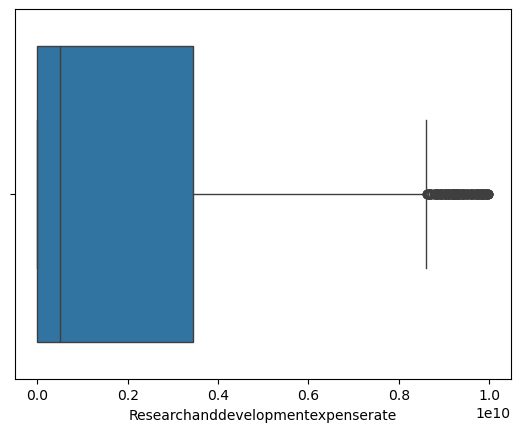

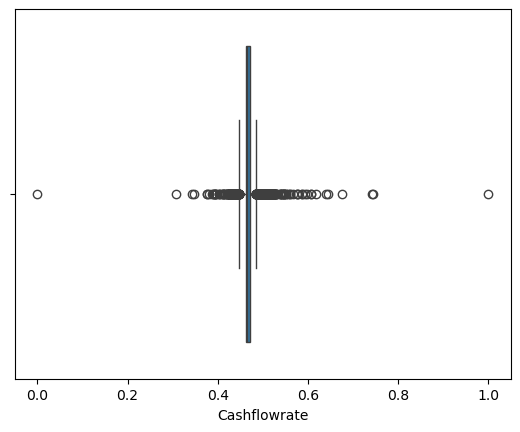

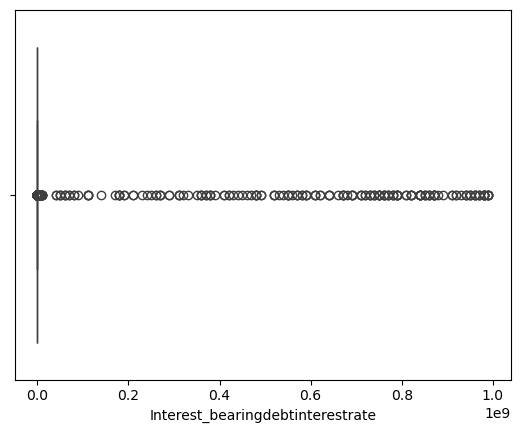

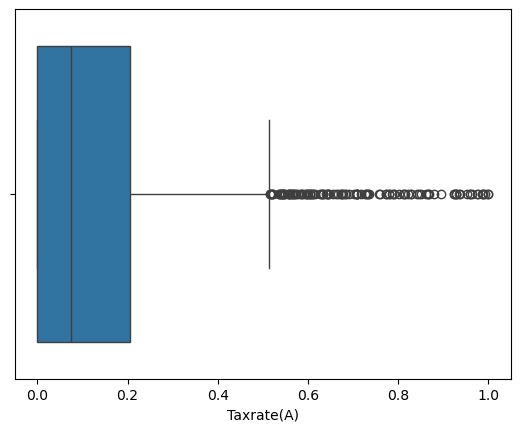

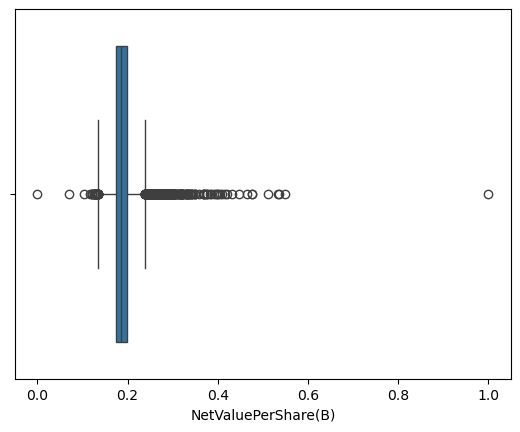

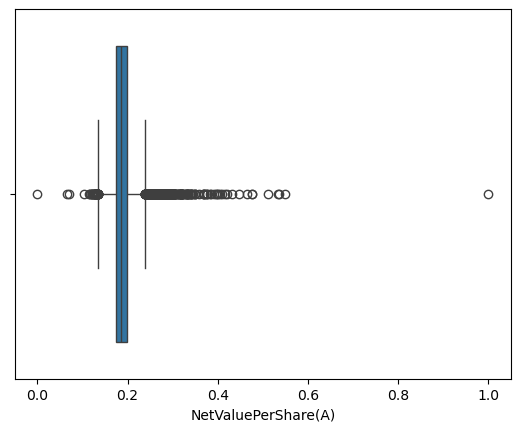

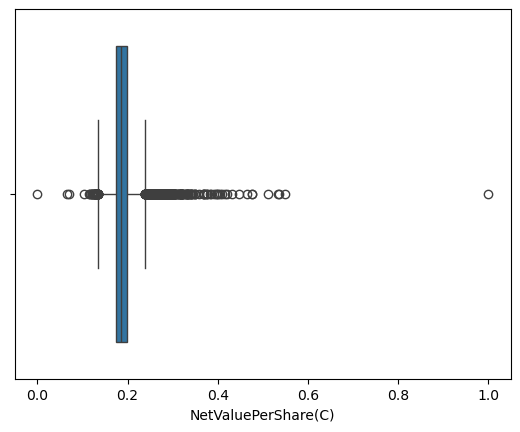

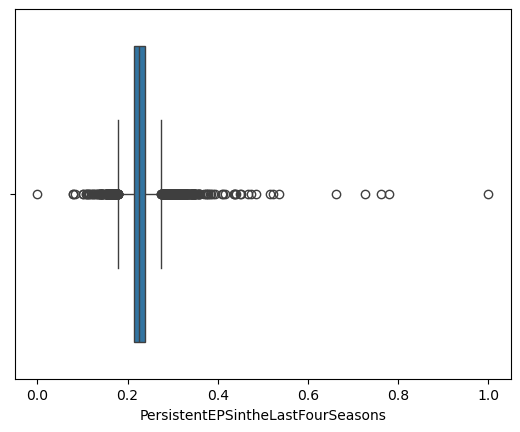

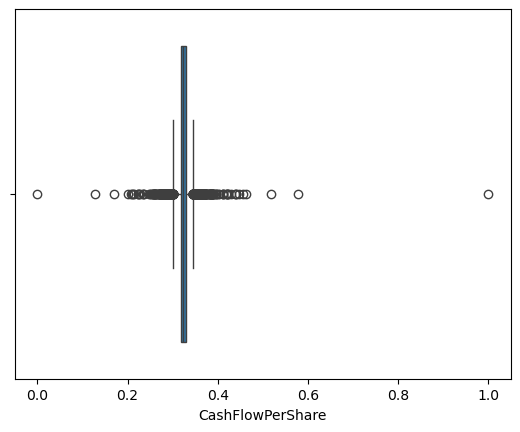

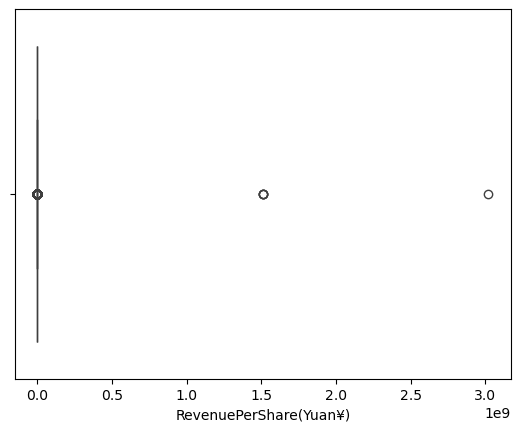

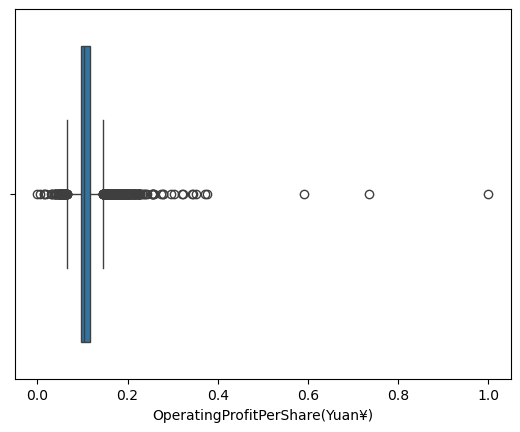

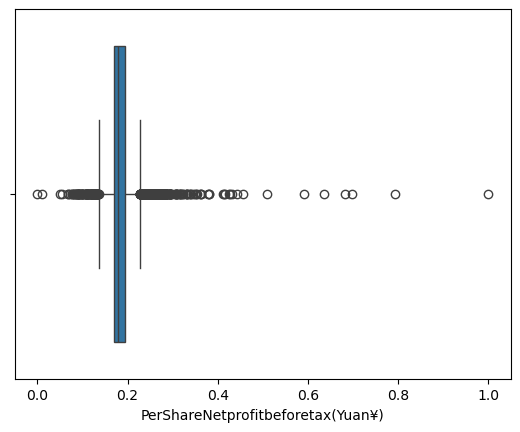

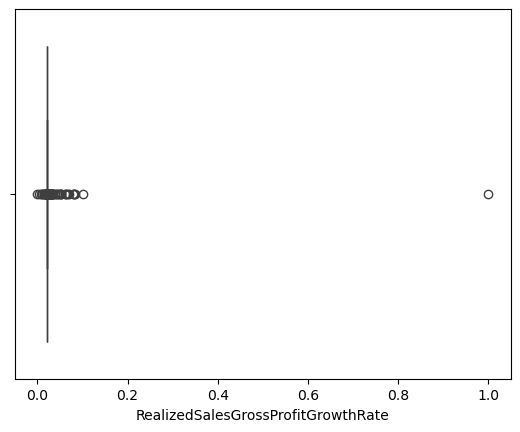

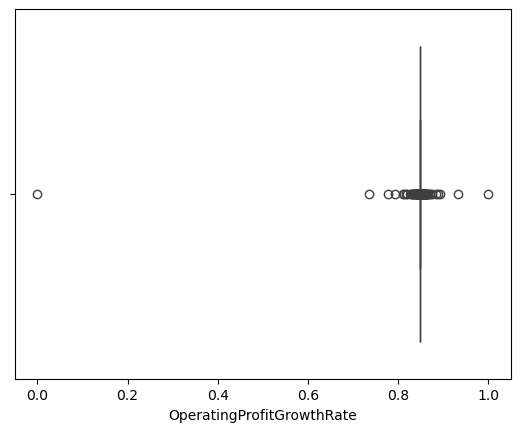

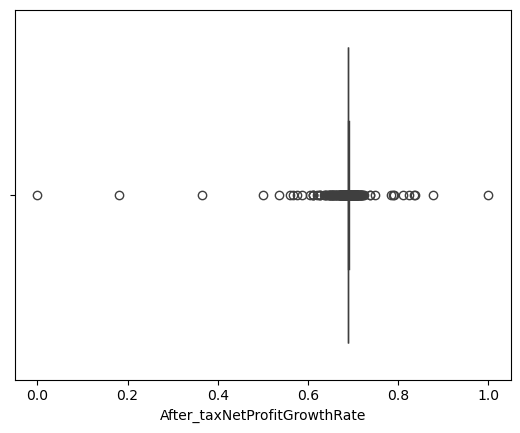

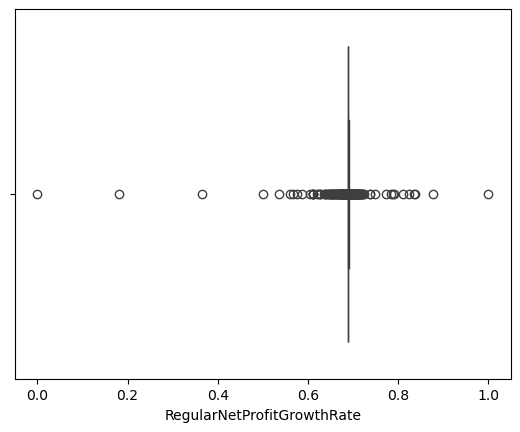

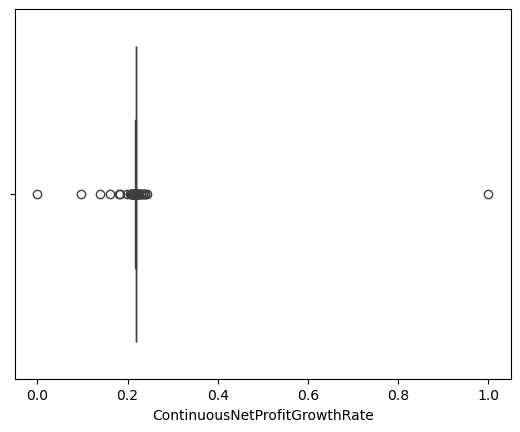

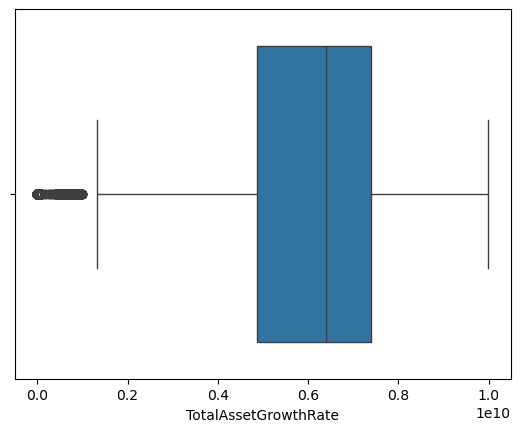

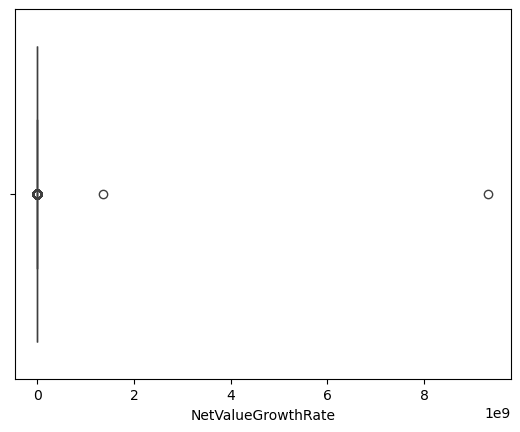

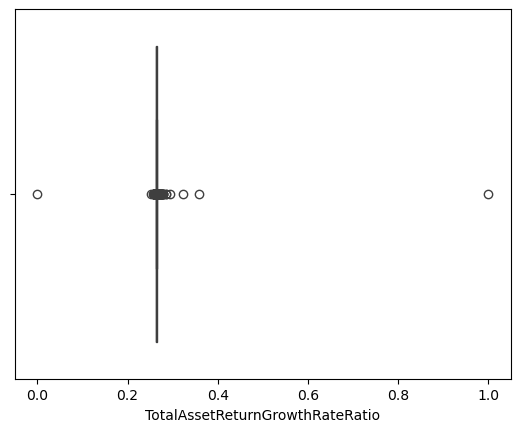

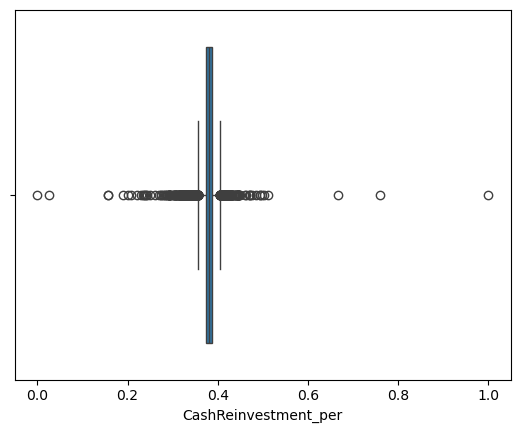

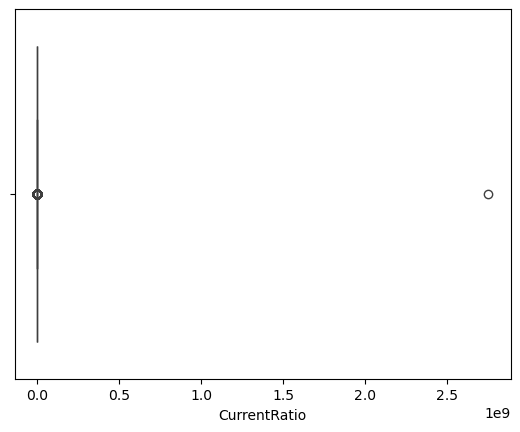

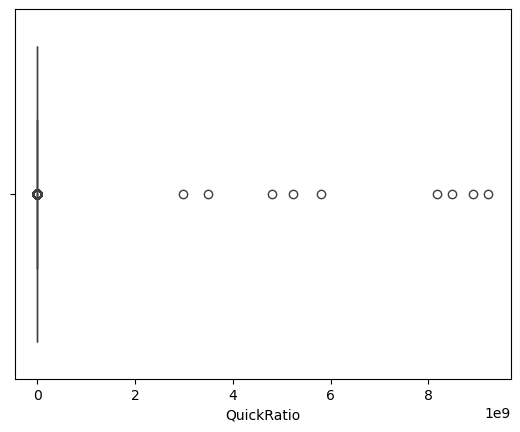

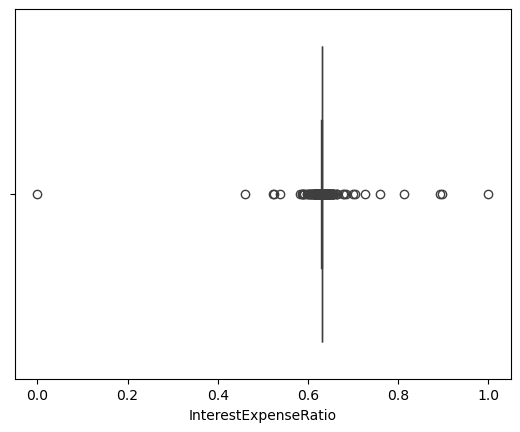

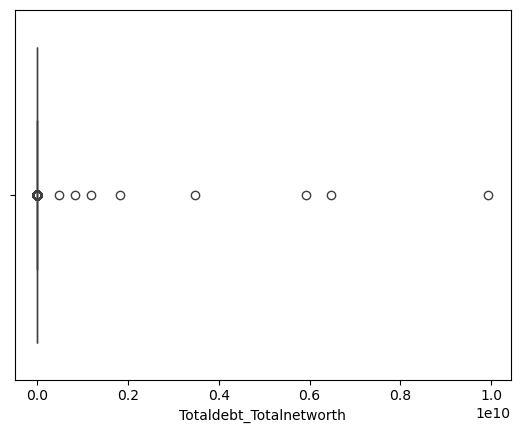

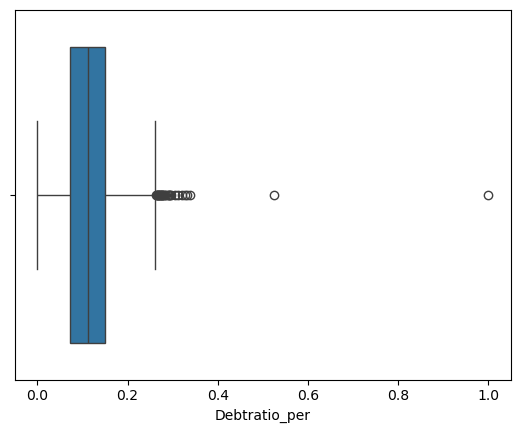

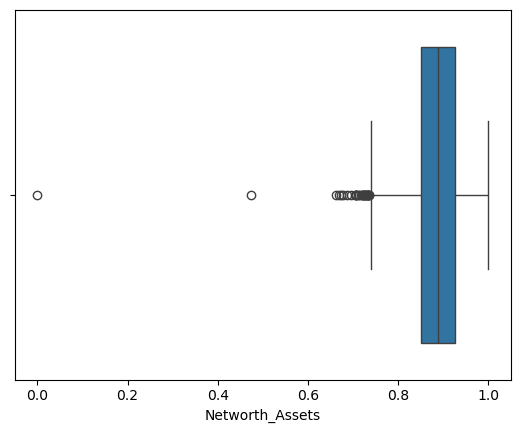

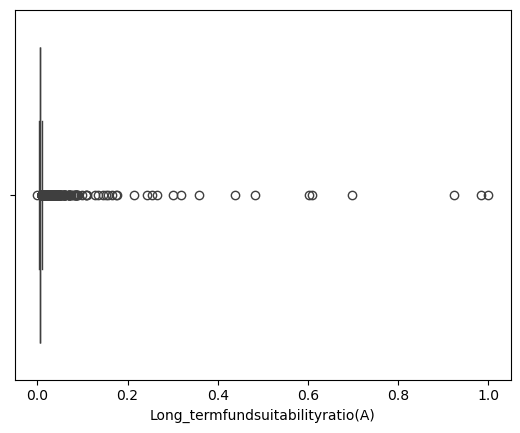

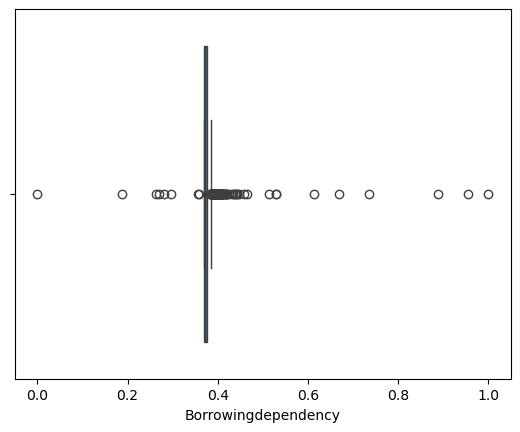

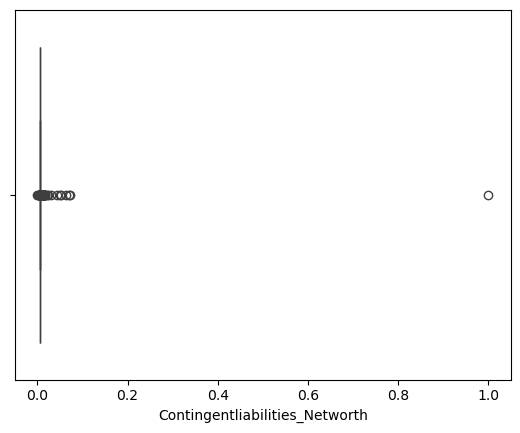

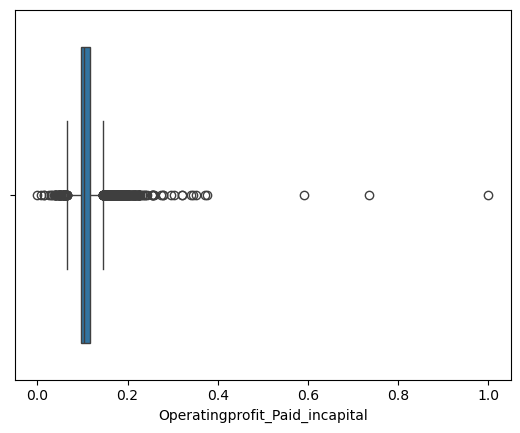

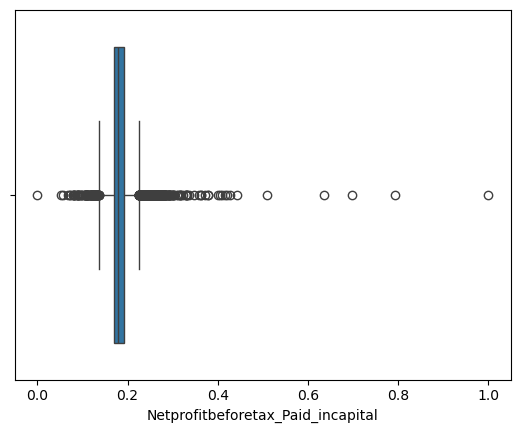

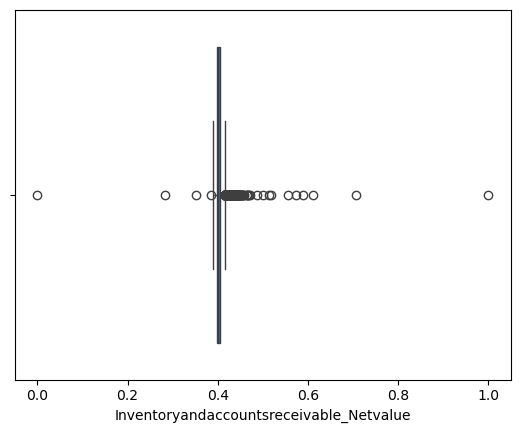

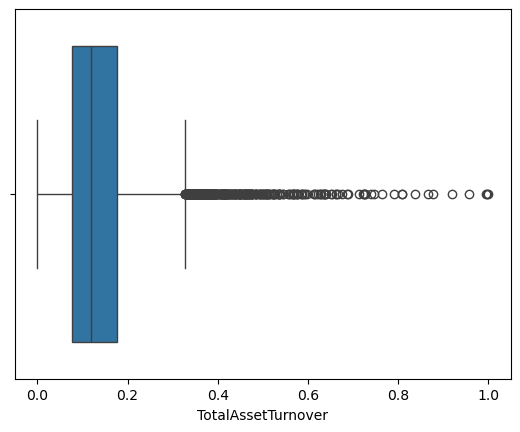

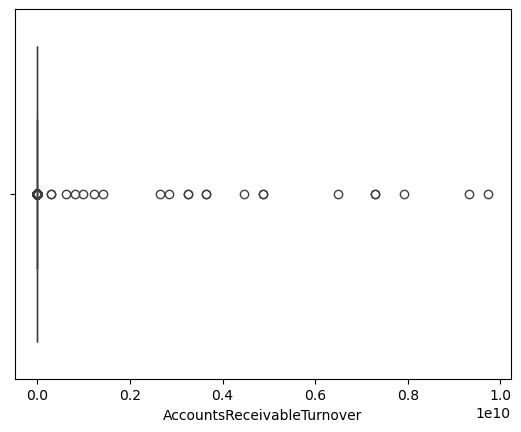

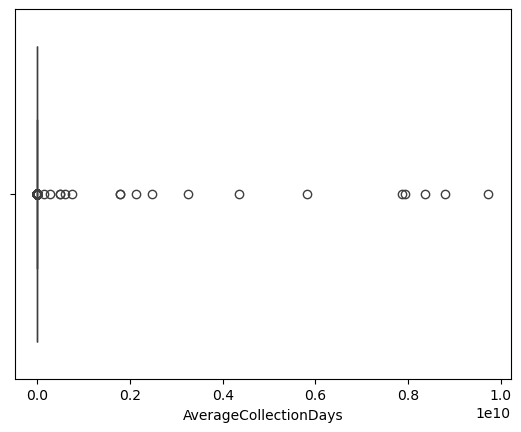

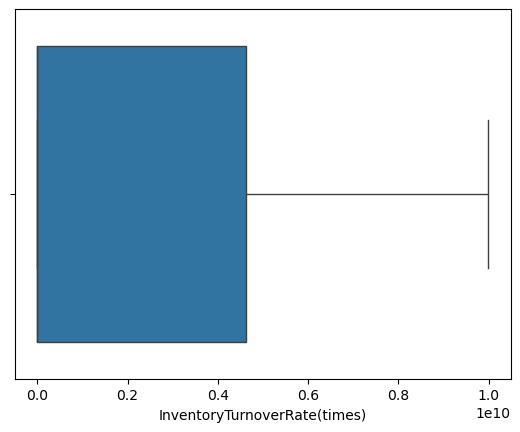

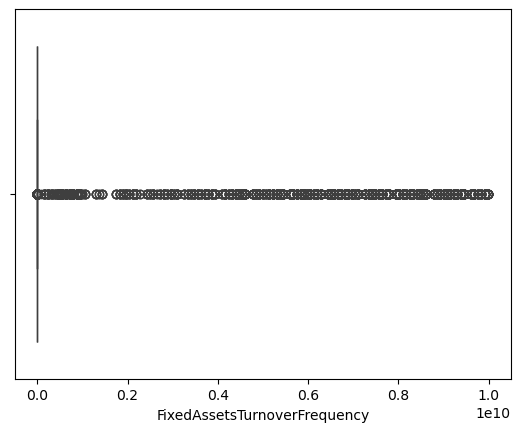

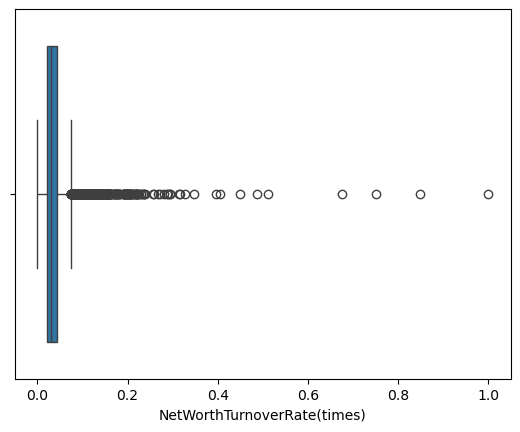

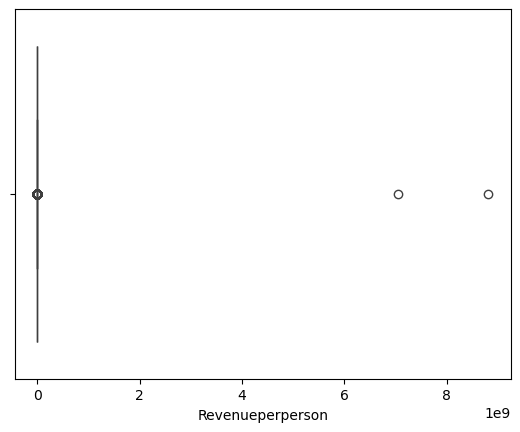

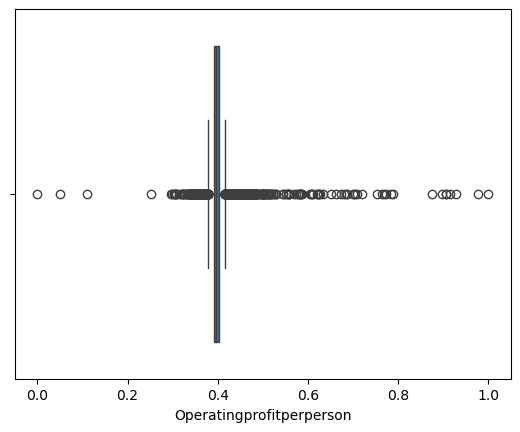

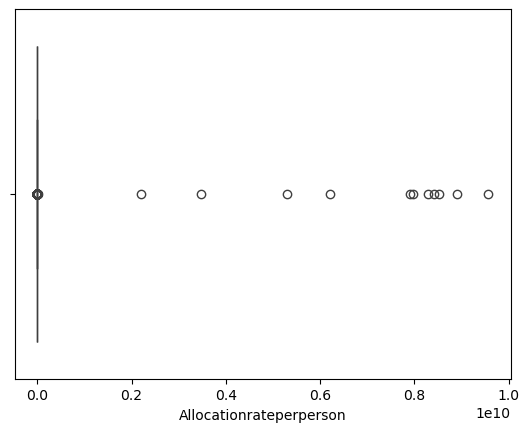

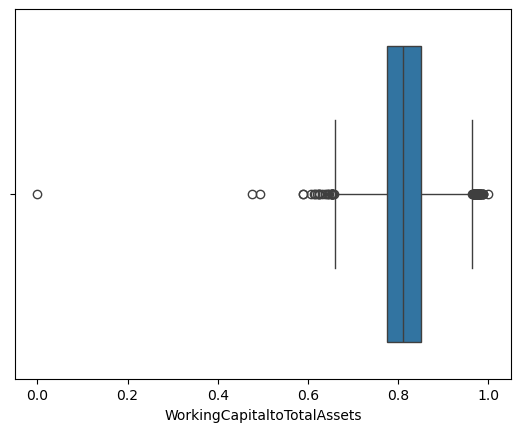

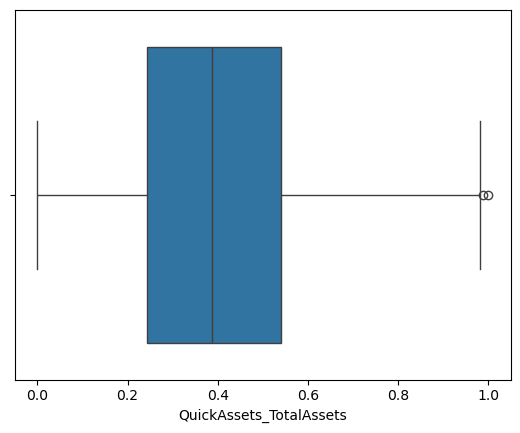

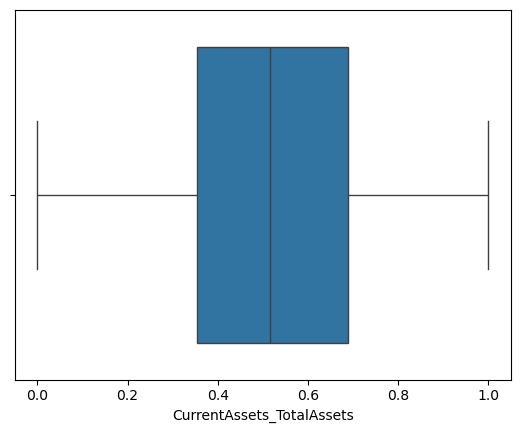

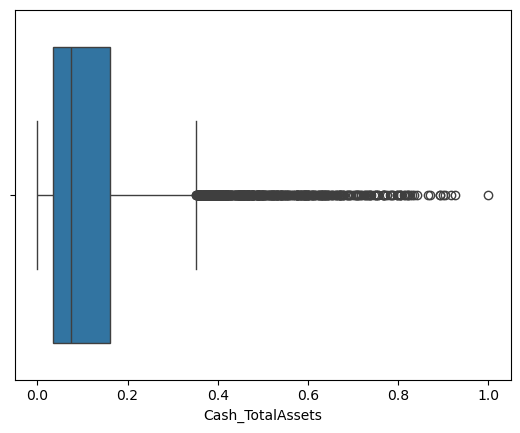

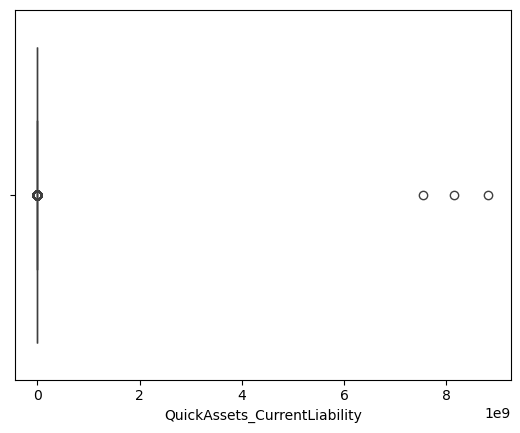

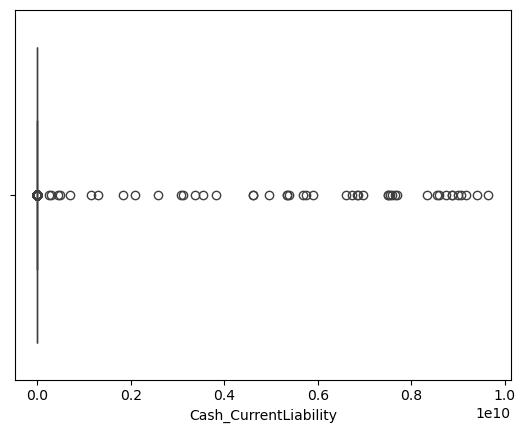

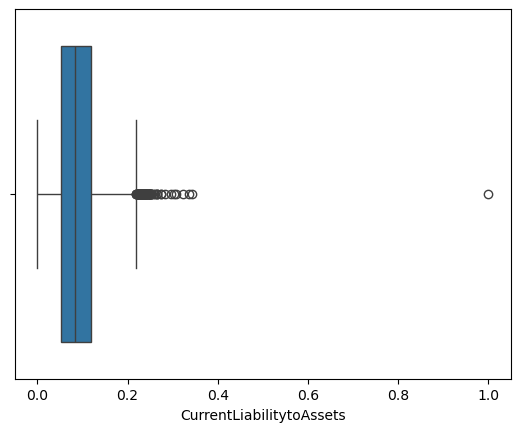

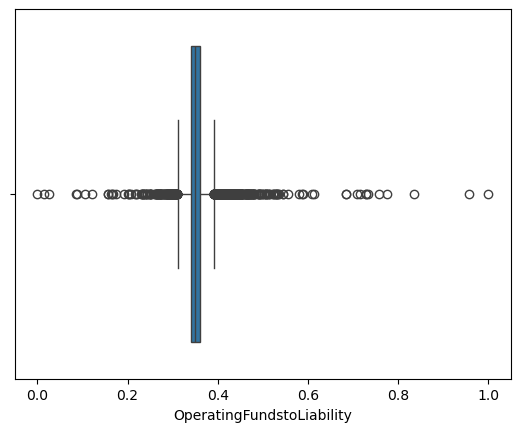

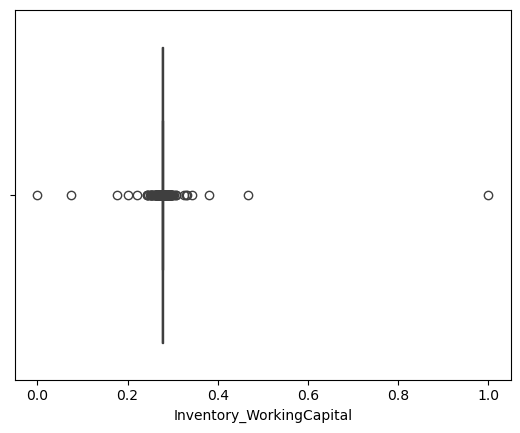

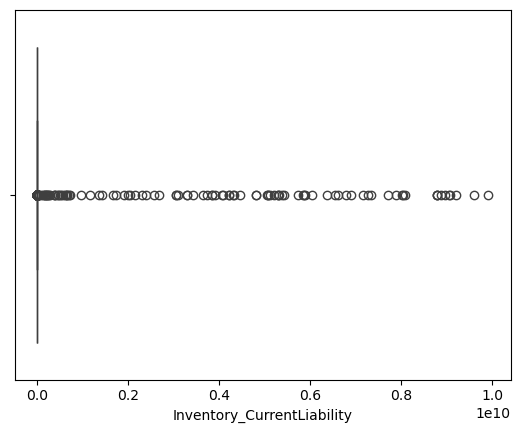

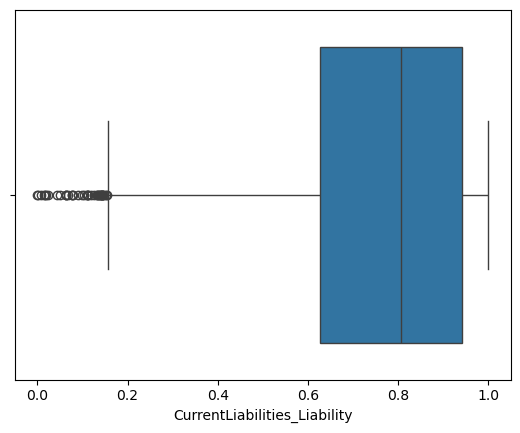

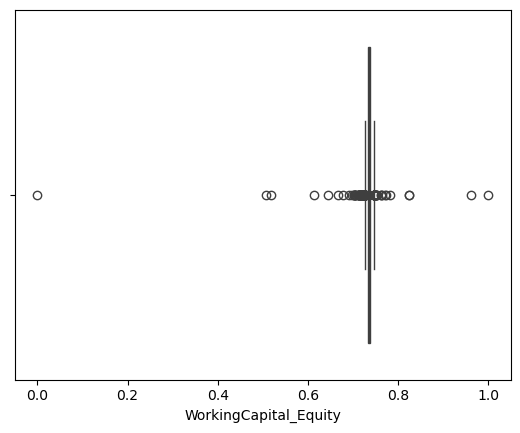

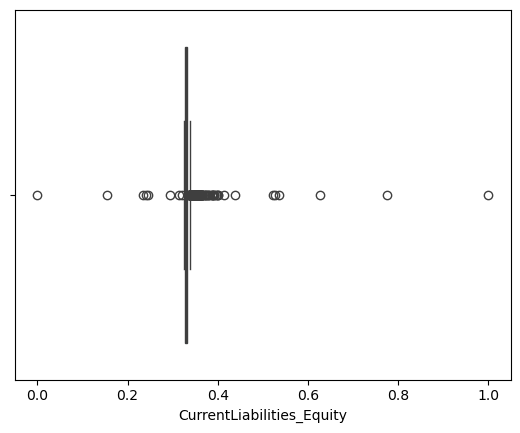

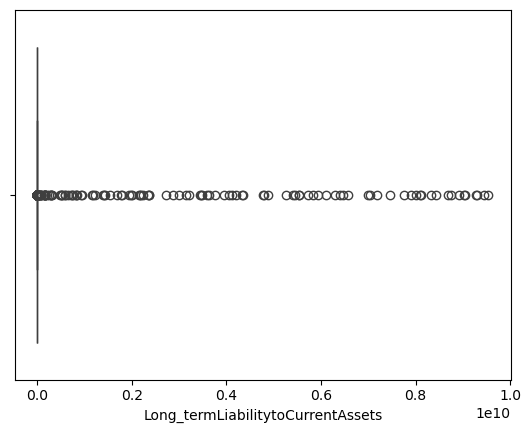

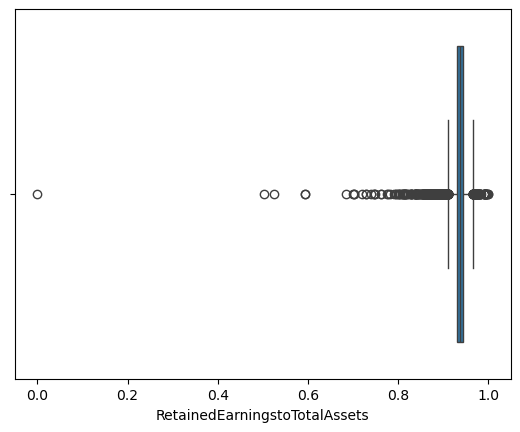

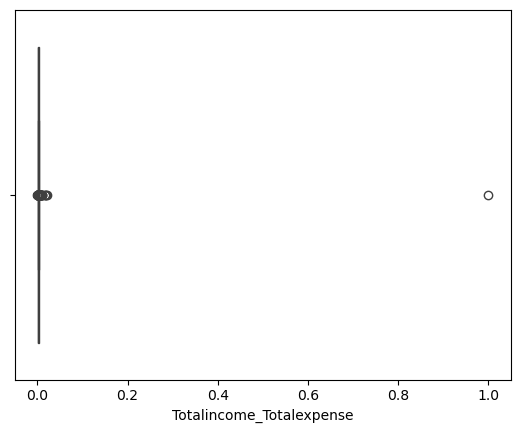

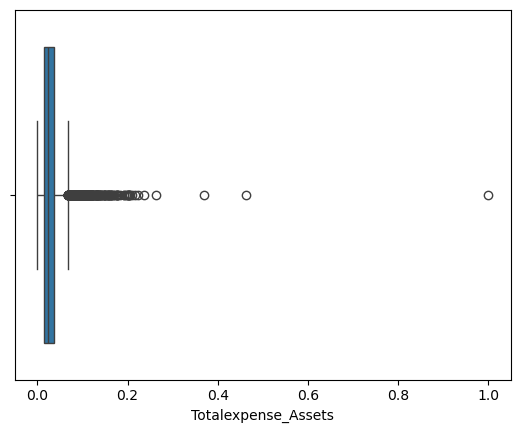

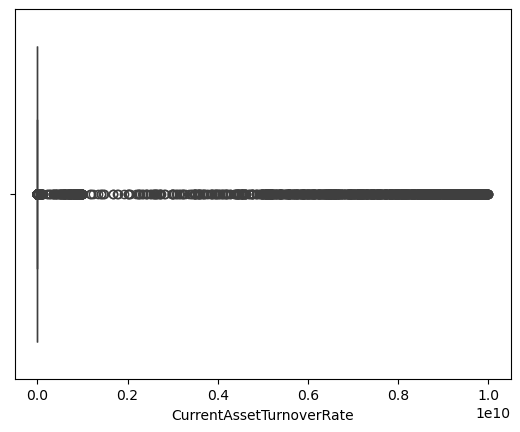

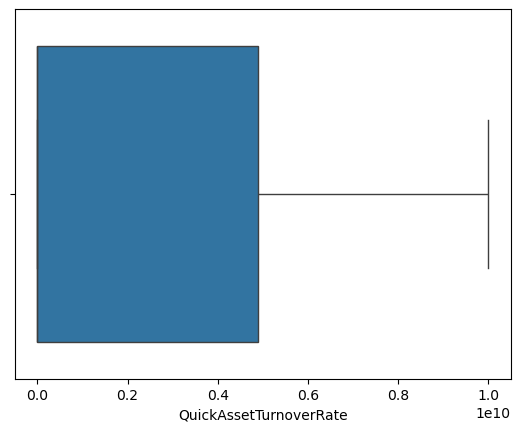

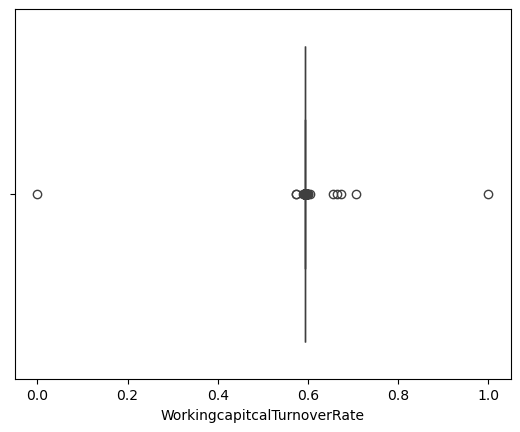

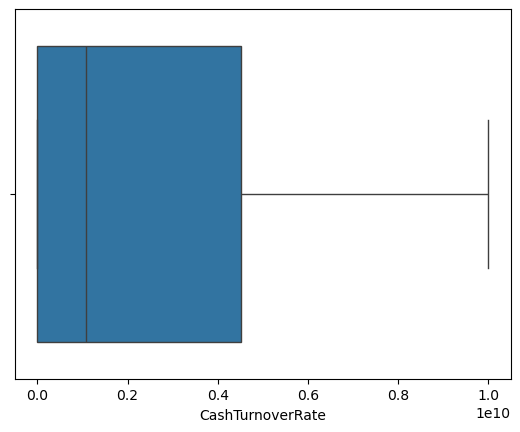

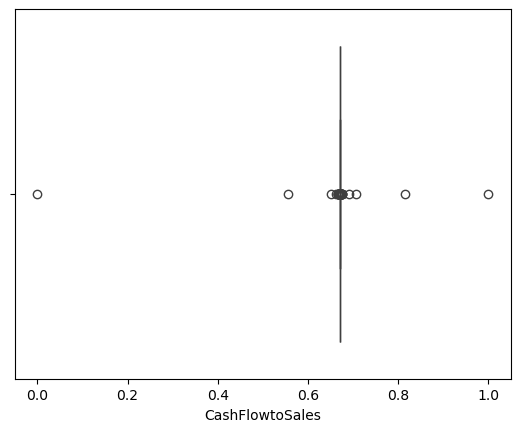

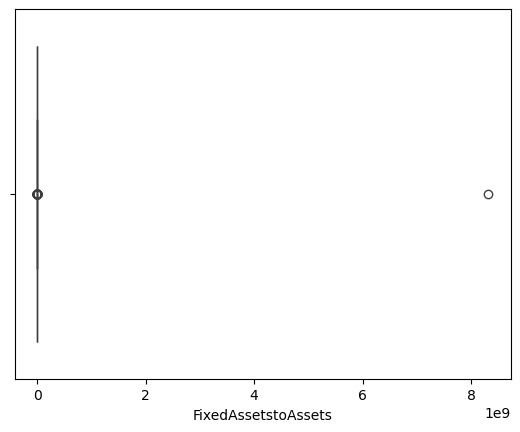

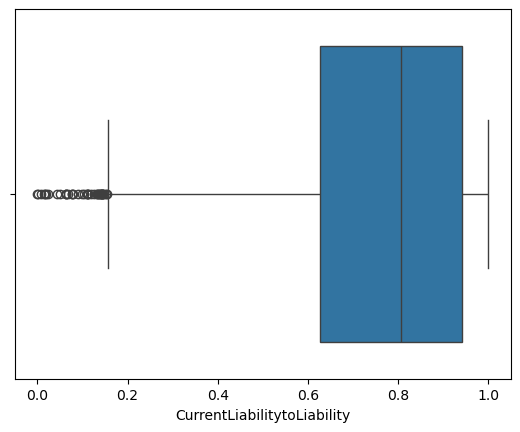

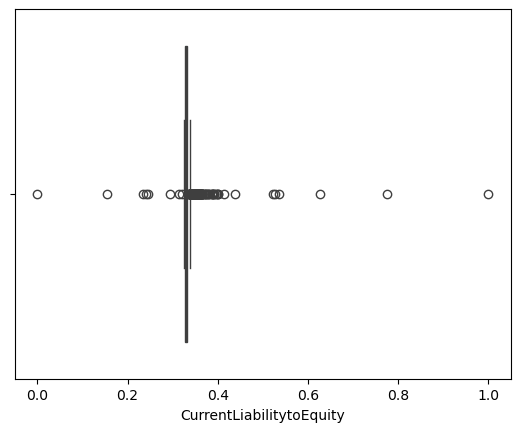

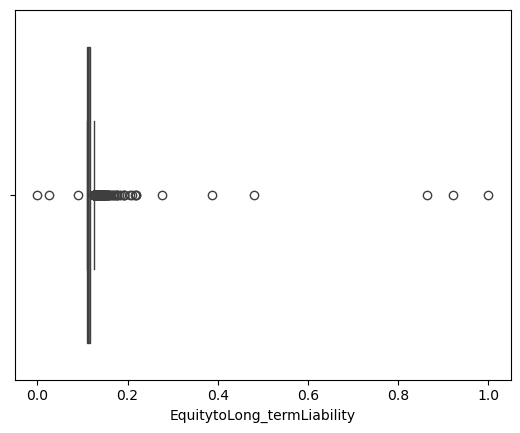

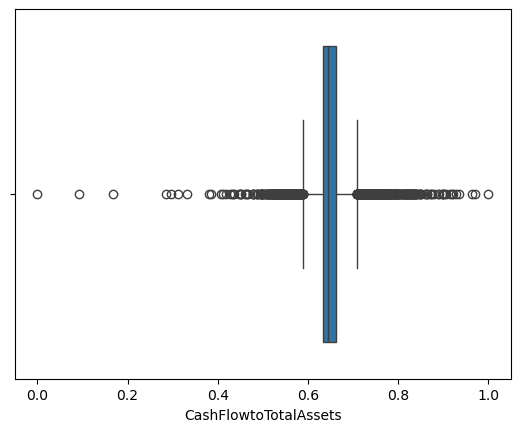

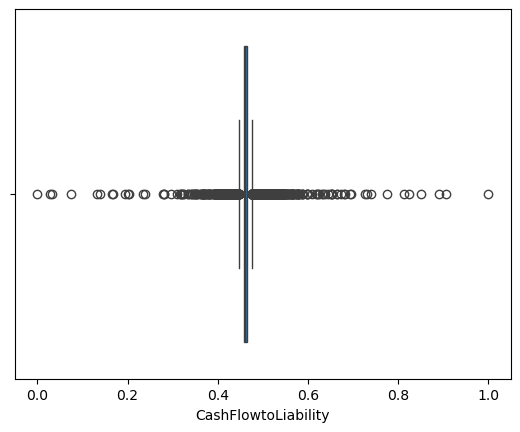

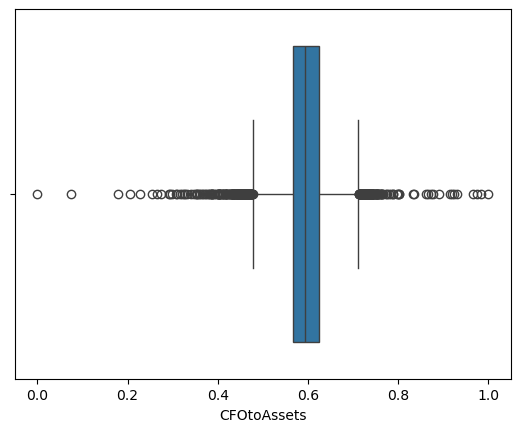

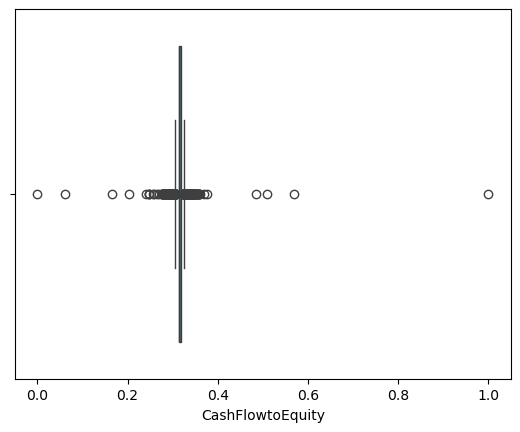

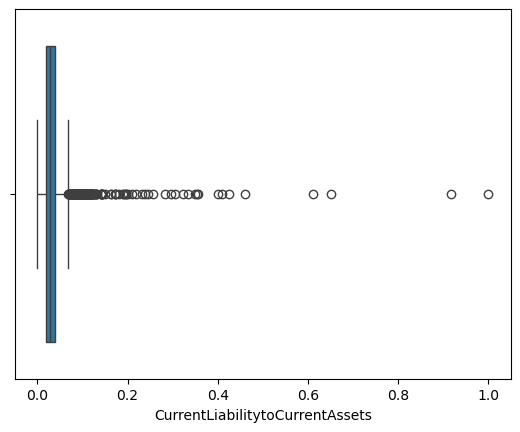

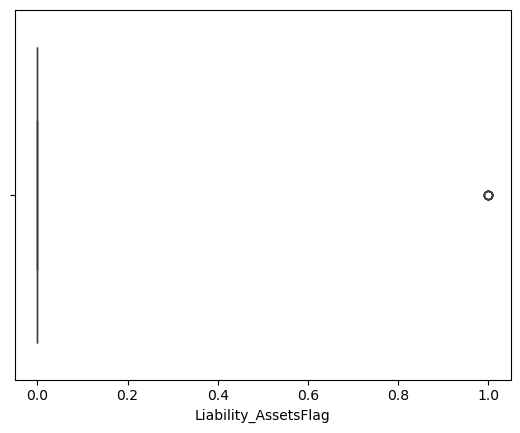

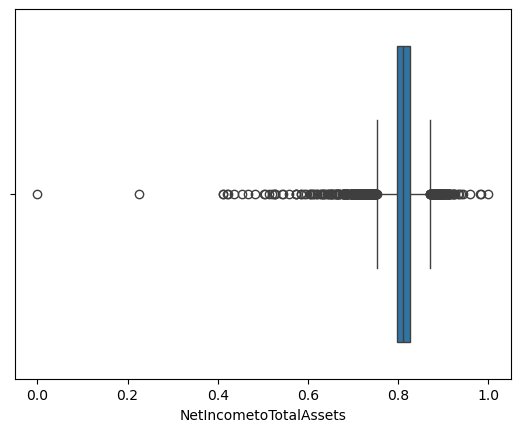

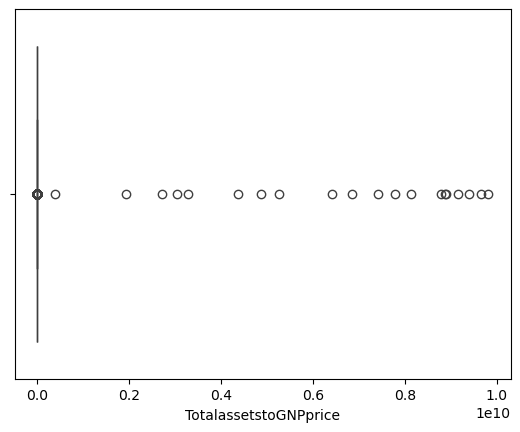

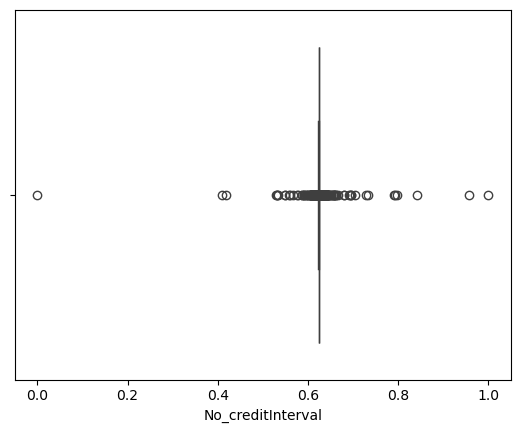

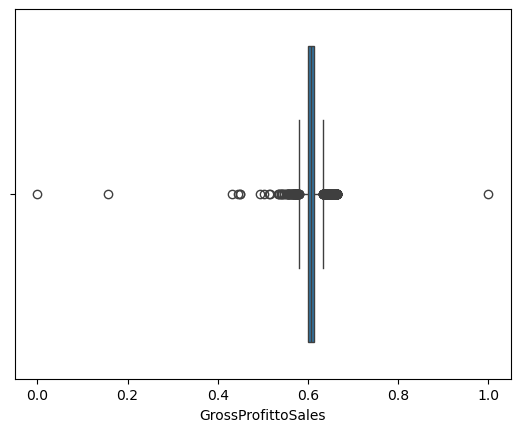

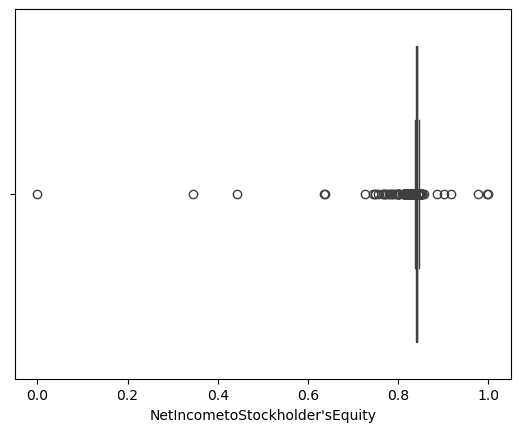

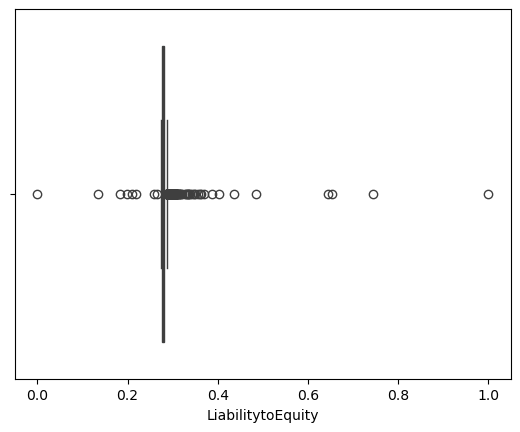

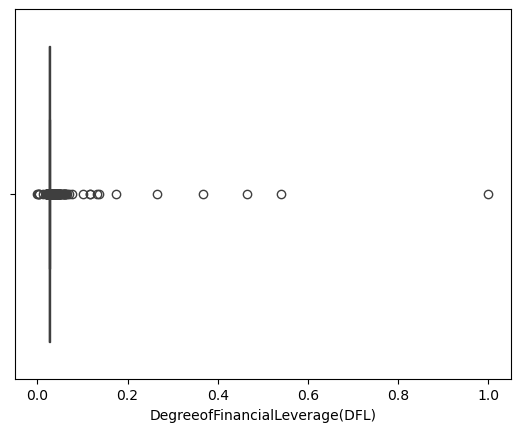

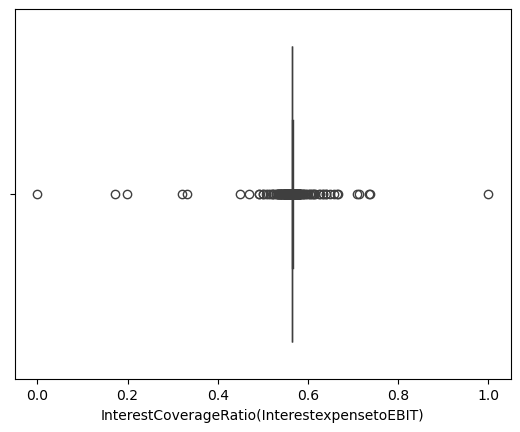

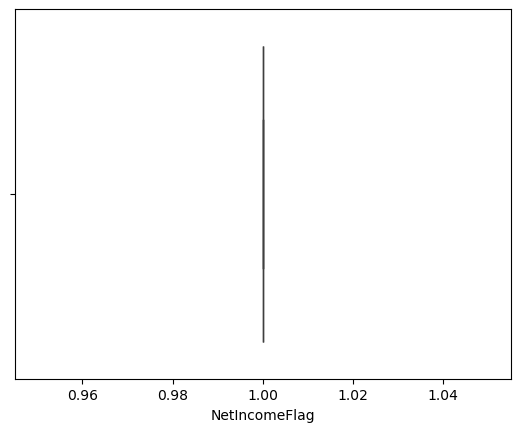

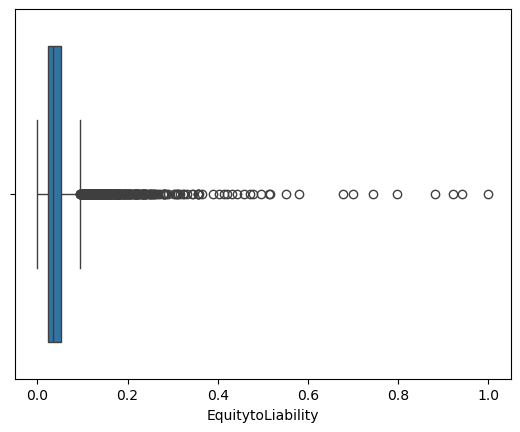

In [17]:
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.show()
# Boxplot the columns whoes having outlier.

### 1.3Detect and handle outliers.

In [18]:
# Function to detect outliers using IQR for all columns
def detect_outliers_iqr(newdf):
    outliers = {}
    for column in newdf.columns:
        if newdf[column].dtype != 'object':  # Ensure the column is numerical
            Q1 = newdf[column].quantile(0.25)
            Q3 = newdf[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = newdf[(newdf[column] < lower_bound) | (newdf[column] > upper_bound)]
    return outliers

print("================================================================================")

# Detect outliers in all columns
outliers = detect_outliers_iqr(newdf)

# Print the number of outliers for each feature

count = 0

for feature, outlier_data in outliers.items():
    print(f'{feature}: {len(outlier_data)} outliers')
    if len(outlier_data) > 0:
        count+=1

# print("=============================================================================================")
    
# # Function to cap outliers for all columns using IQR
def cap_outliers(newdf):
    for column in newdf.columns:
        if newdf[column].dtype != 'object':  # Ensure the column is numerical
            Q1 = newdf[column].quantile(0.25)
            Q3 = newdf[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            idx=np.where(newdf[column]>upper_bound)
            newdf[column].iloc[idx]=upper_bound
            idx=np.where(newdf[column]<lower_bound)
            newdf[column].iloc[idx]=lower_bound
    return newdf

# Handle outliers in all columns
data_cleaned = cap_outliers(newdf)

# Verify the changes

print("----------------------------------------------------------------------------")

print("Outliers have been capped.")
data_cleaned.describe()

print("------------------------------------------------------------------------------")
print("Outlier Found In : ",count,"  Column")

ROA(C)beforeinterestanddepreciationbeforeinterest: 391 outliers
ROA(A)beforeinterestand_peraftertax: 561 outliers
ROA(B)beforeinterestanddepreciationaftertax: 432 outliers
OperatingGrossMargin: 320 outliers
RealizedSalesGrossMargin: 318 outliers
OperatingProfitRate: 716 outliers
Pre_taxnetInterestRate: 773 outliers
After_taxnetInterestRate: 867 outliers
Non_industryincomeandexpenditure_revenue: 1094 outliers
Continuousinterestrate(aftertax): 806 outliers
OperatingExpenseRate: 0 outliers
Researchanddevelopmentexpenserate: 182 outliers
Cashflowrate: 576 outliers
Interest_bearingdebtinterestrate: 396 outliers
Taxrate(A): 120 outliers
NetValuePerShare(B): 457 outliers
NetValuePerShare(A): 464 outliers
NetValuePerShare(C): 465 outliers
PersistentEPSintheLastFourSeasons: 508 outliers
CashFlowPerShare: 532 outliers
RevenuePerShare(Yuan¥): 478 outliers
OperatingProfitPerShare(Yuan¥): 442 outliers
PerShareNetprofitbeforetax(Yuan¥): 511 outliers
RealizedSalesGrossProfitGrowthRate: 814 outliers
O

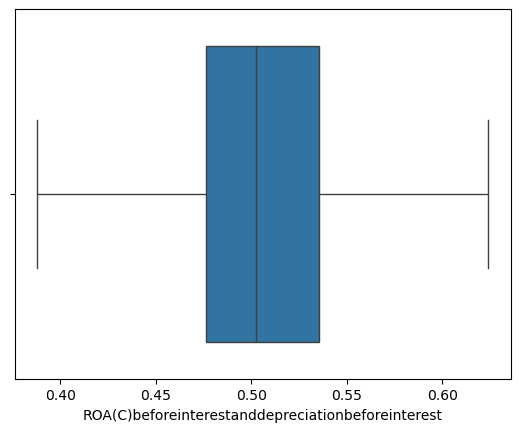

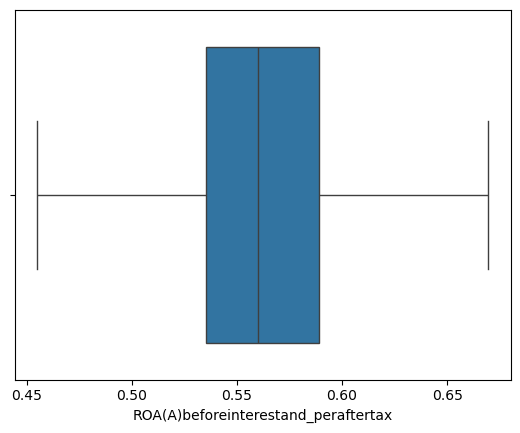

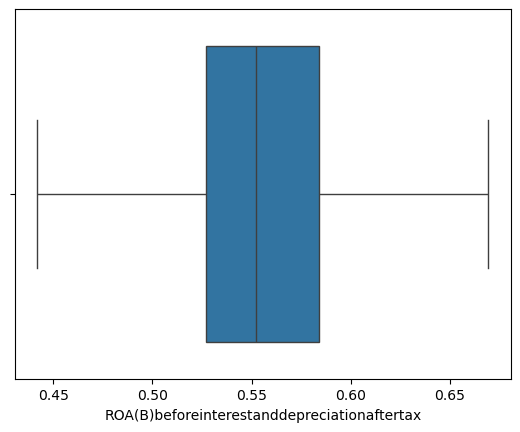

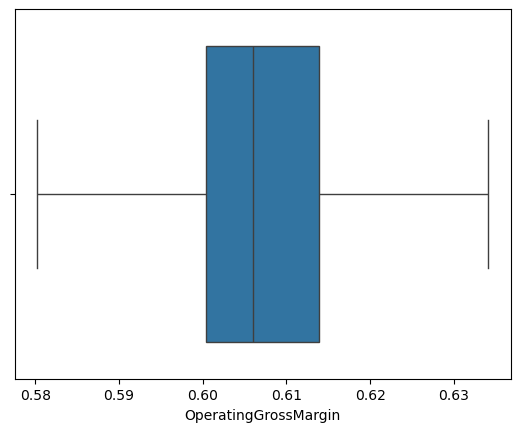

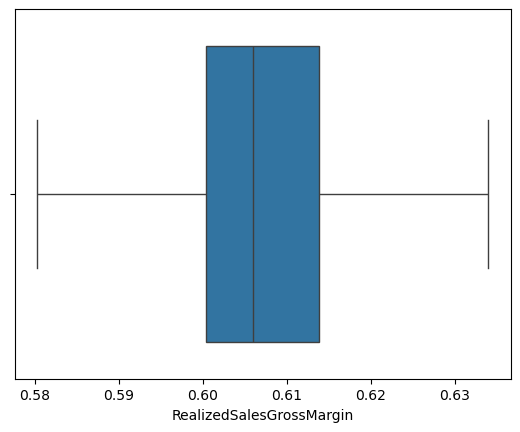

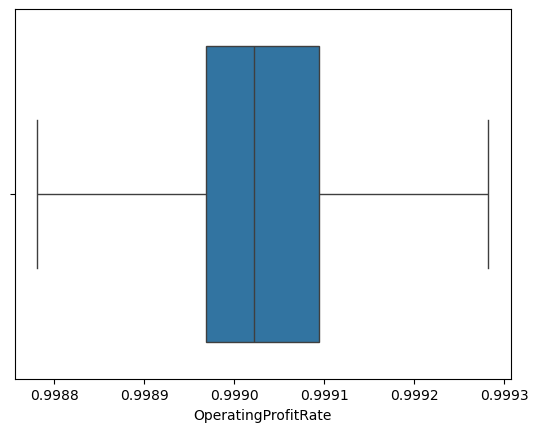

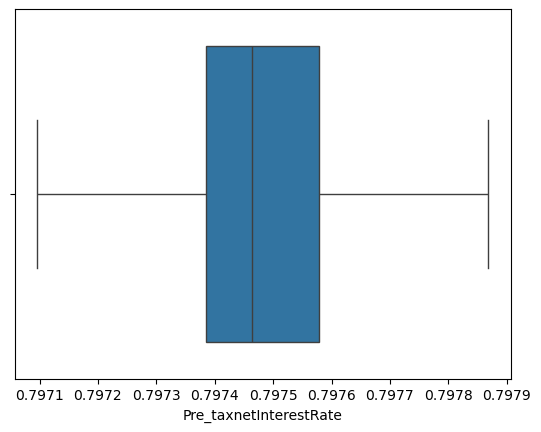

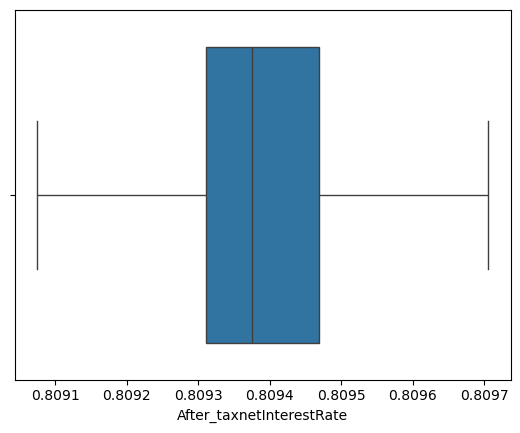

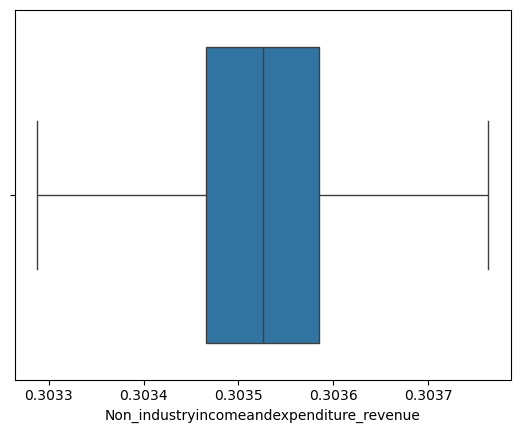

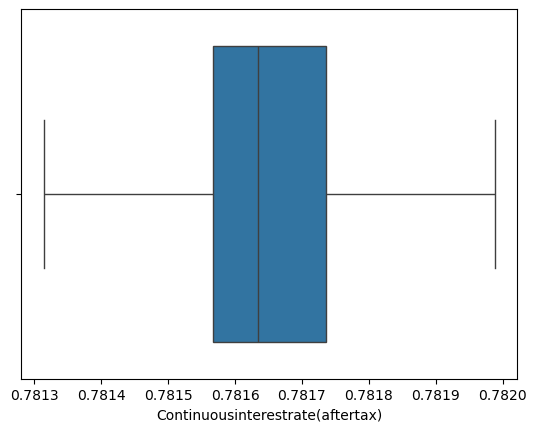

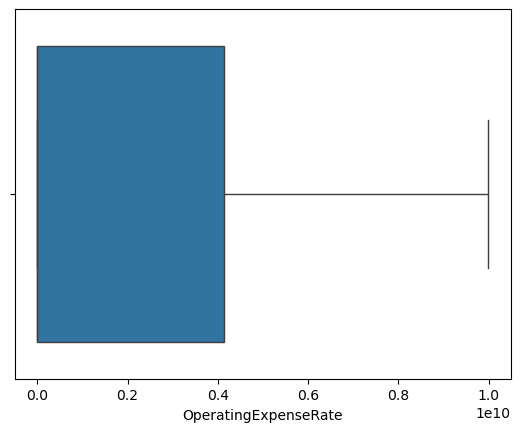

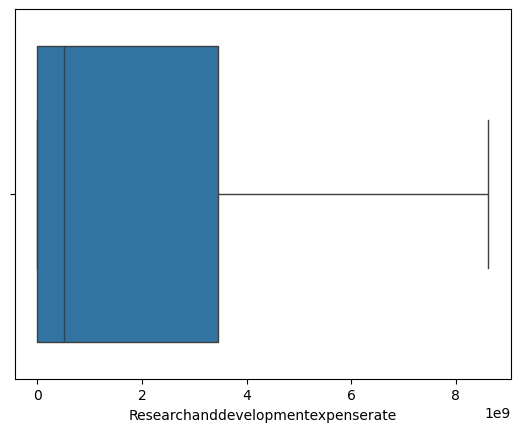

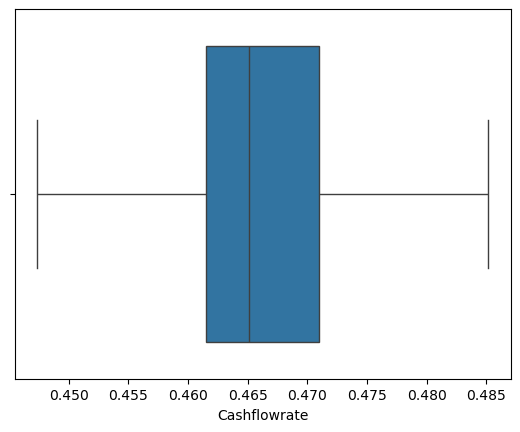

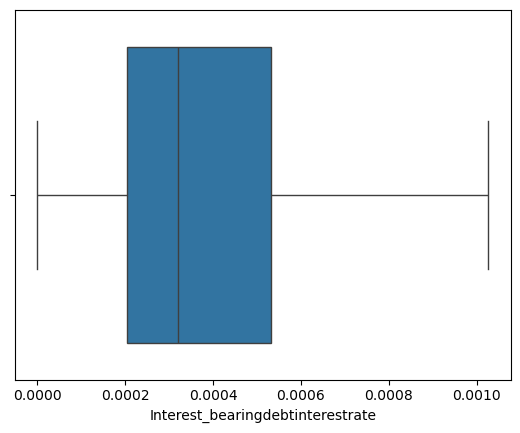

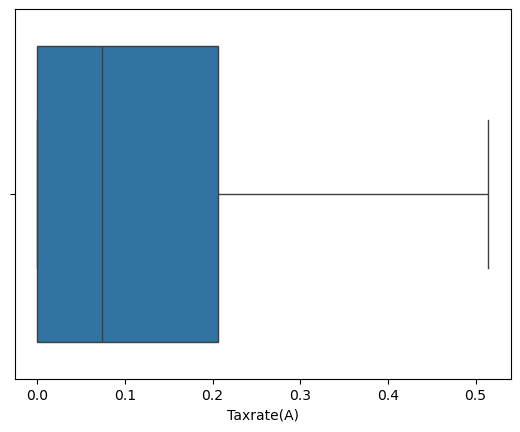

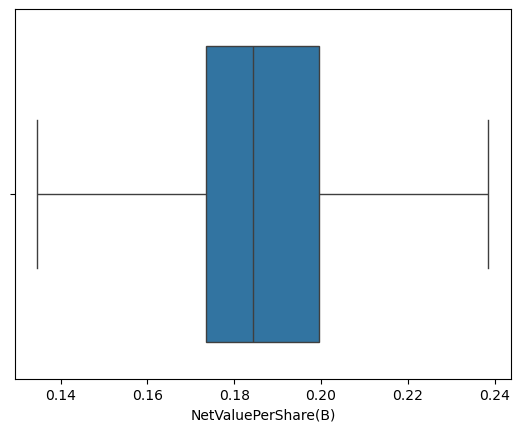

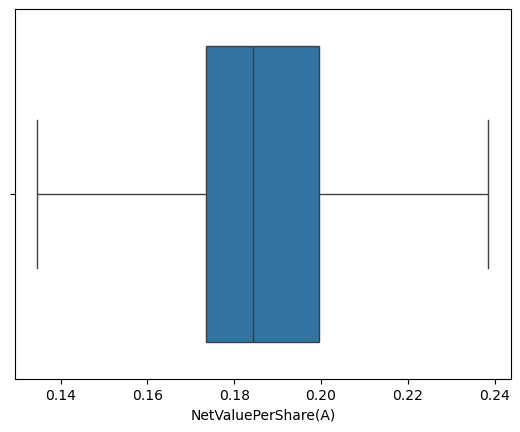

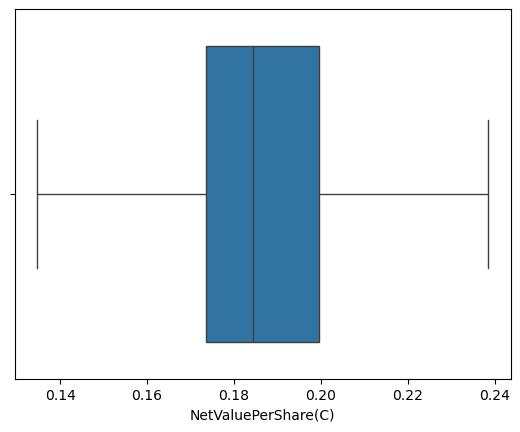

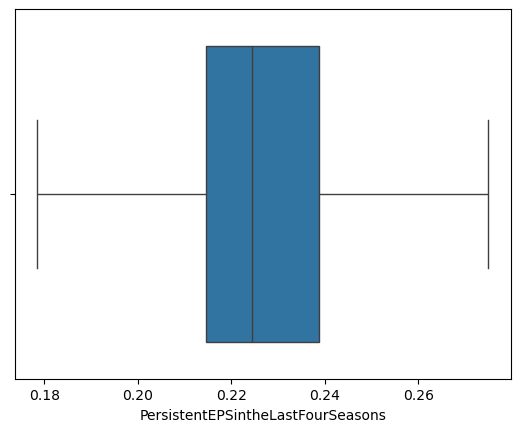

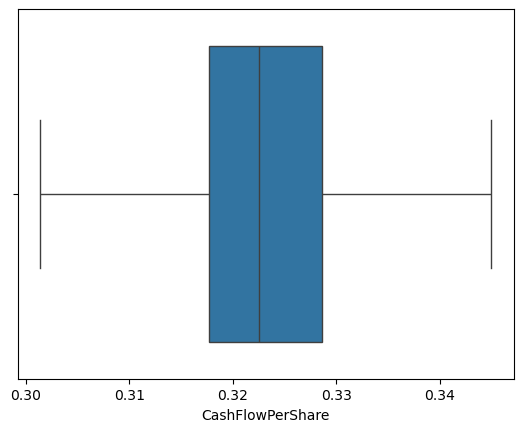

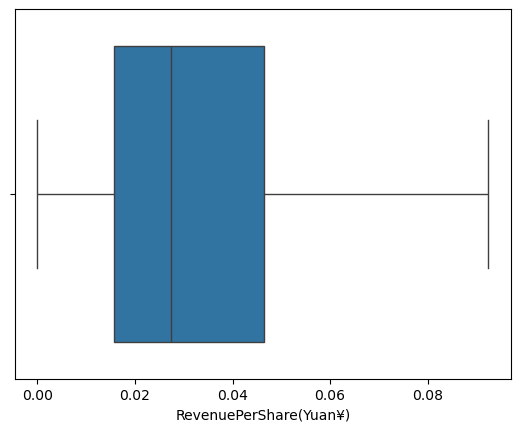

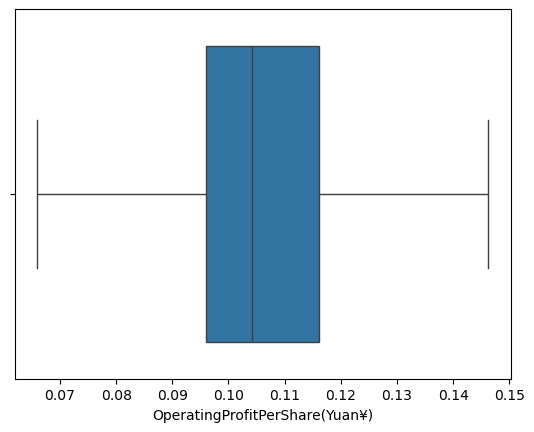

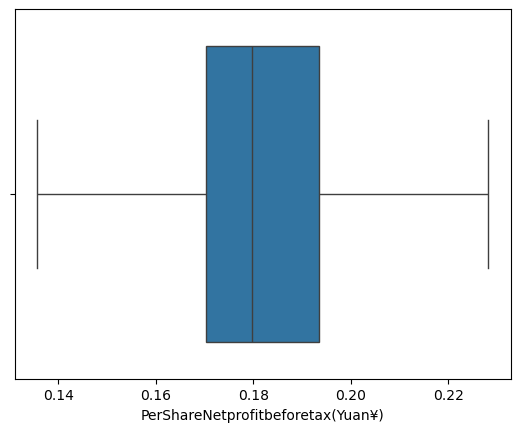

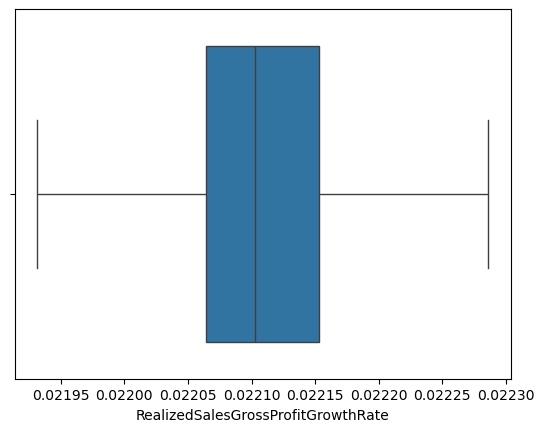

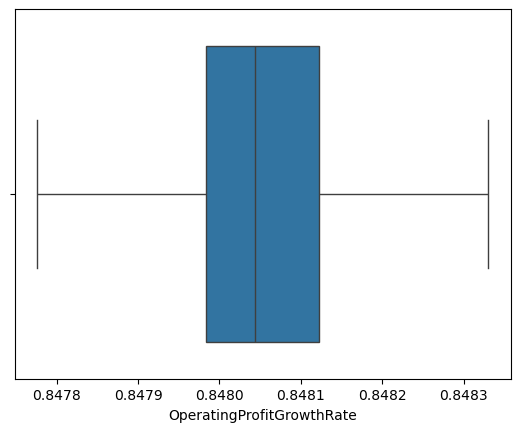

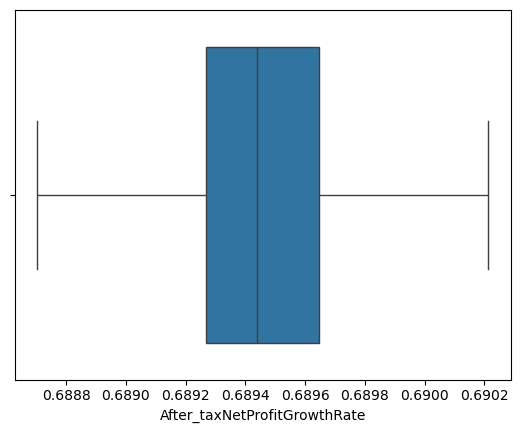

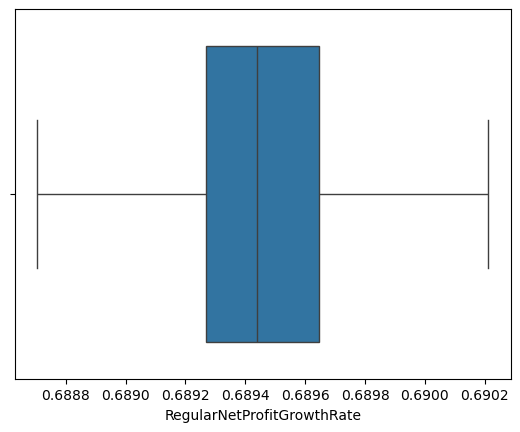

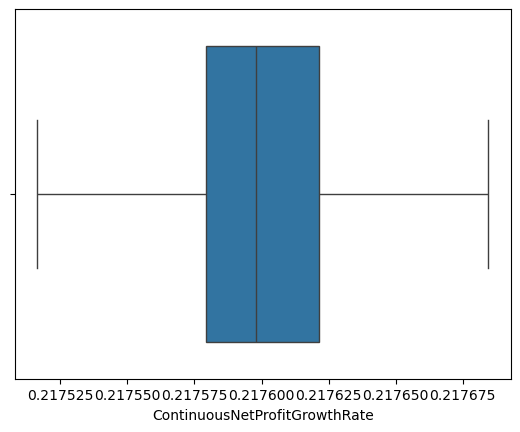

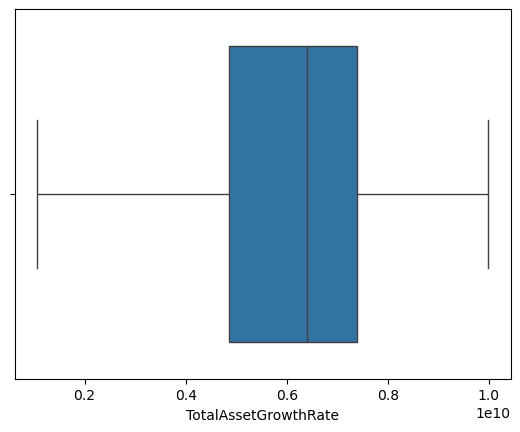

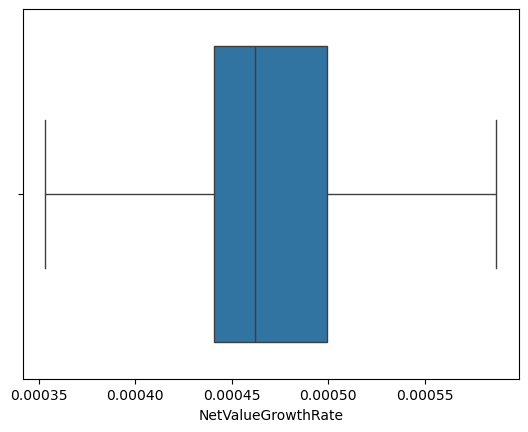

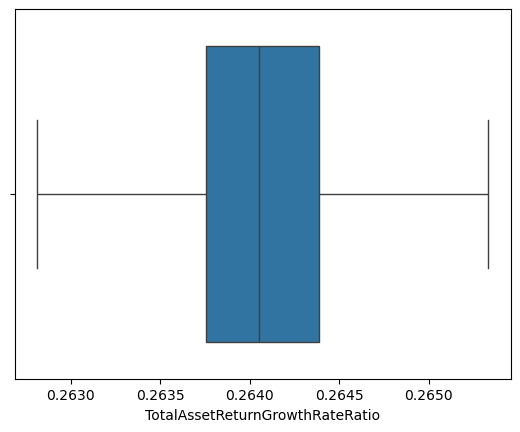

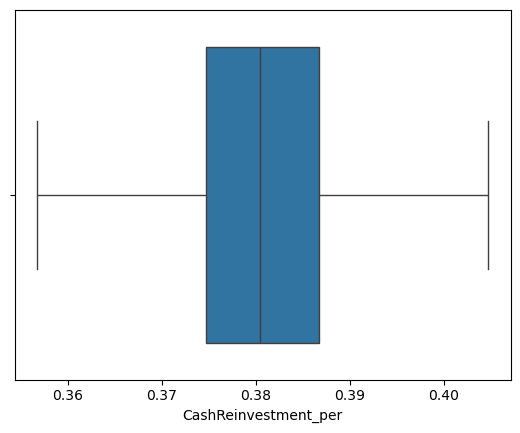

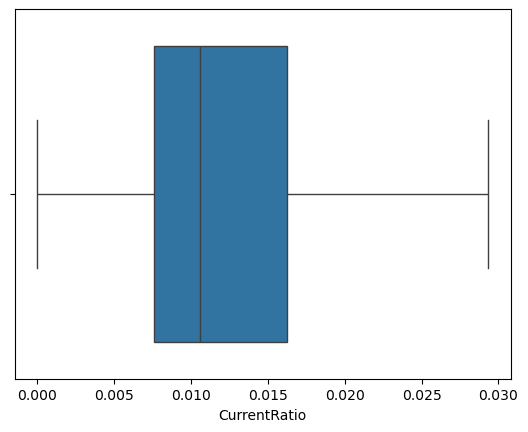

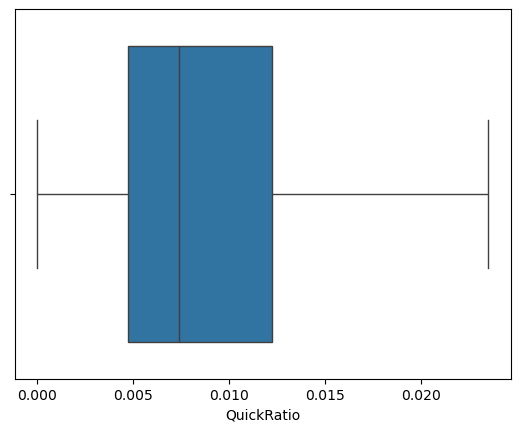

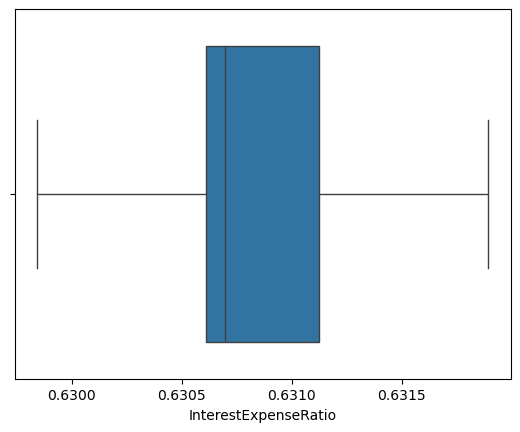

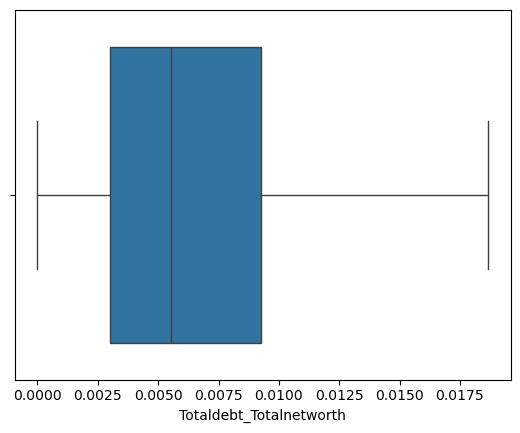

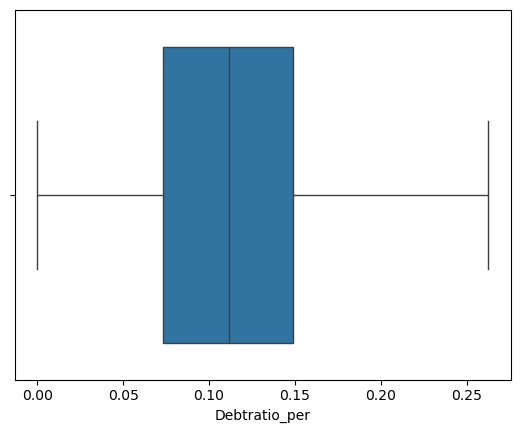

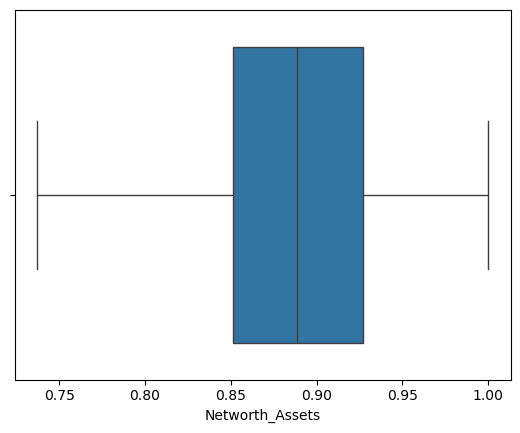

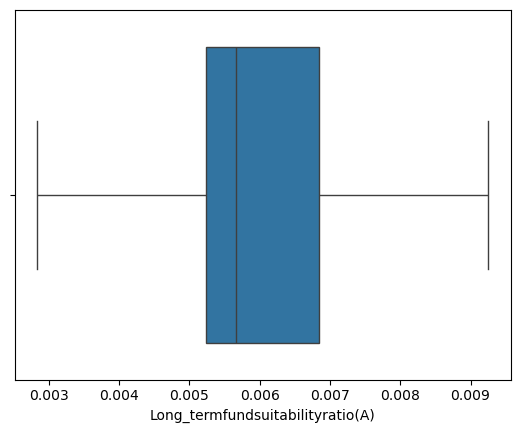

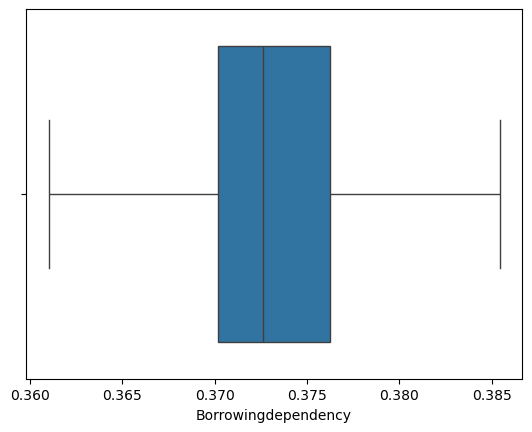

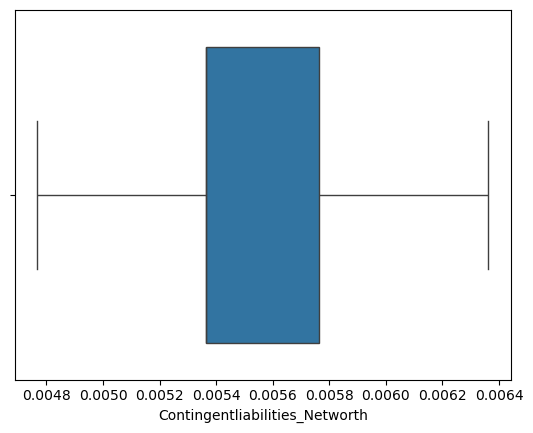

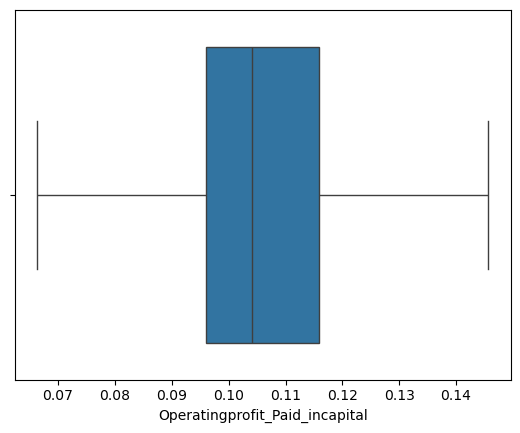

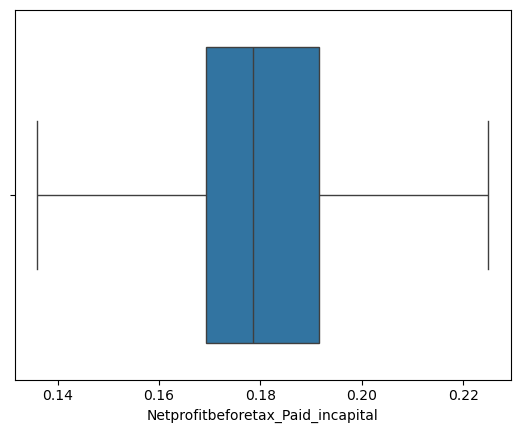

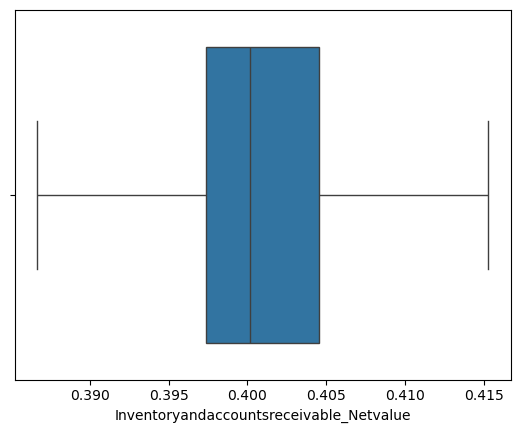

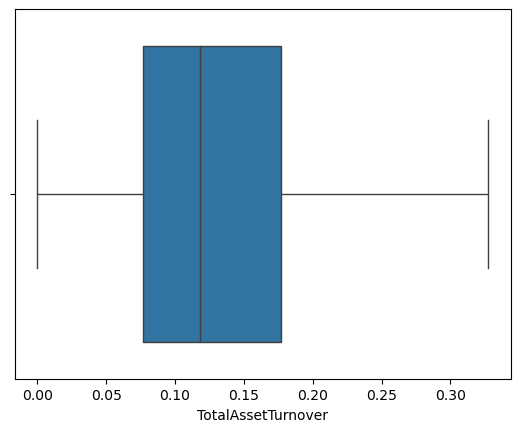

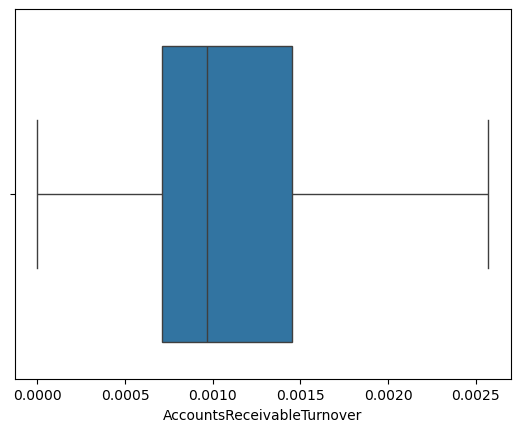

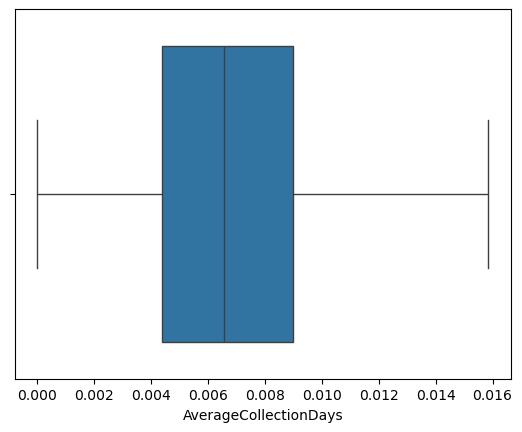

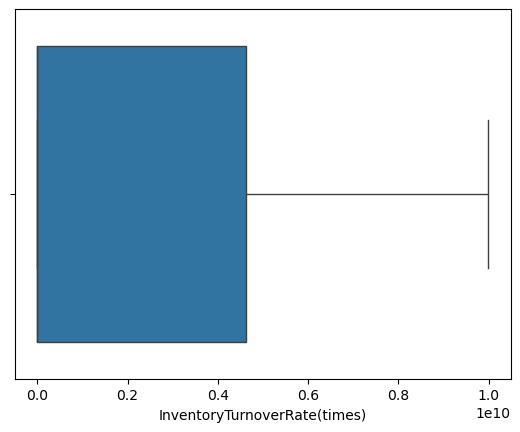

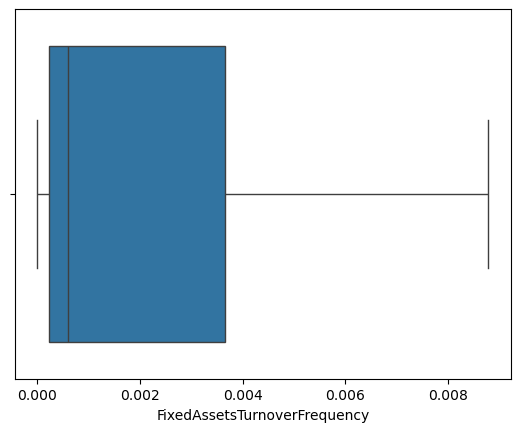

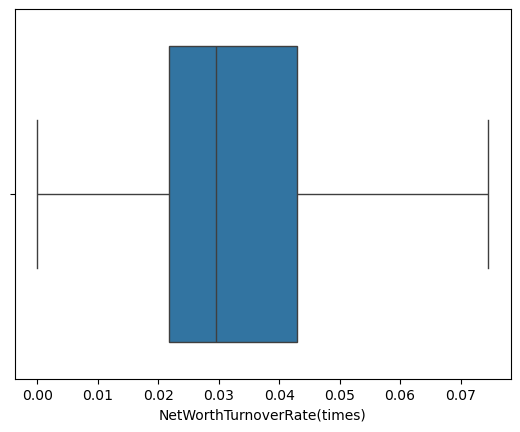

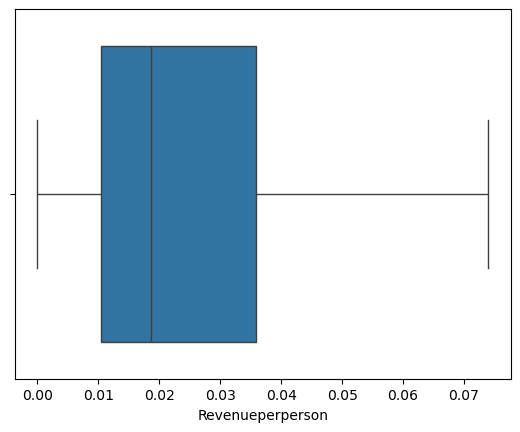

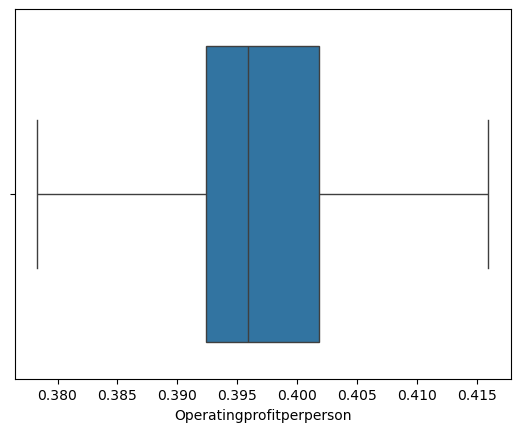

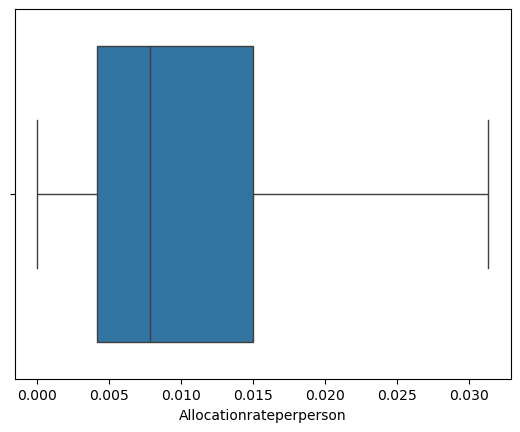

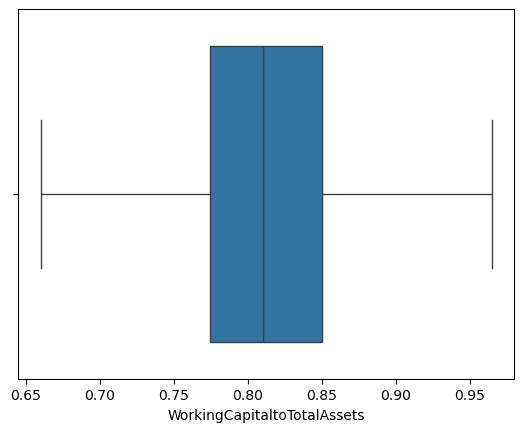

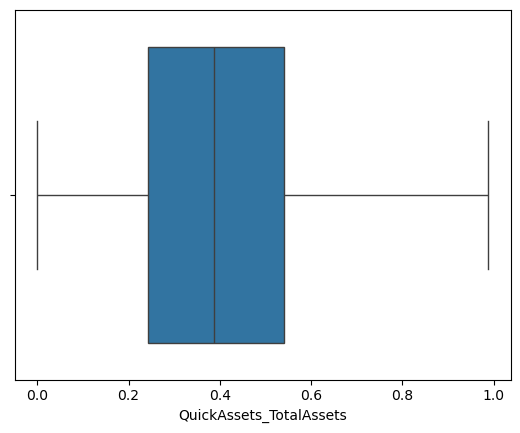

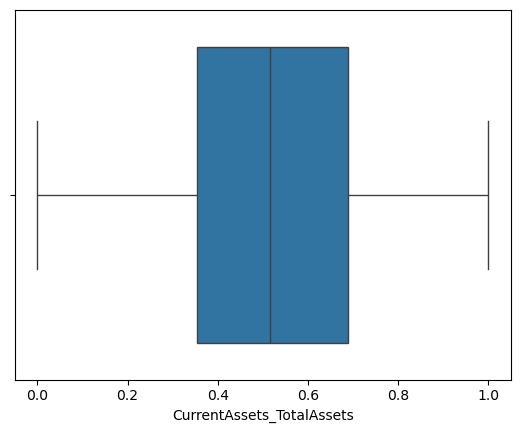

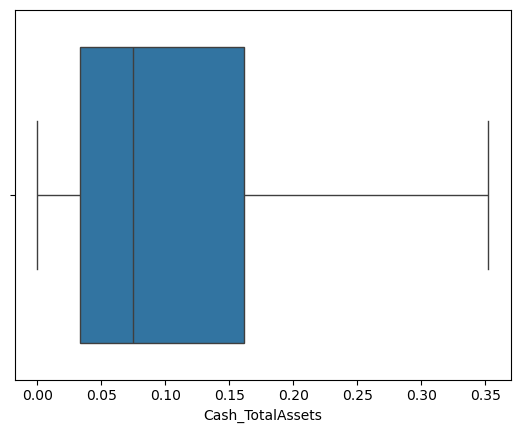

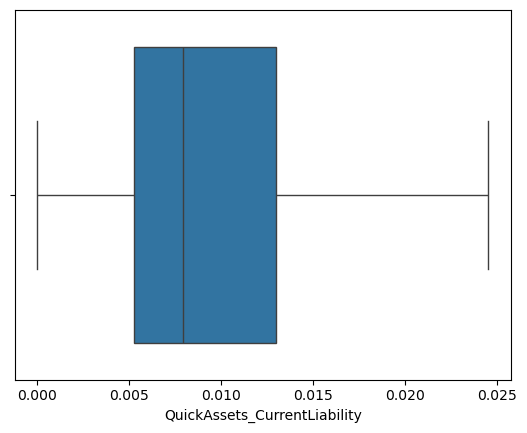

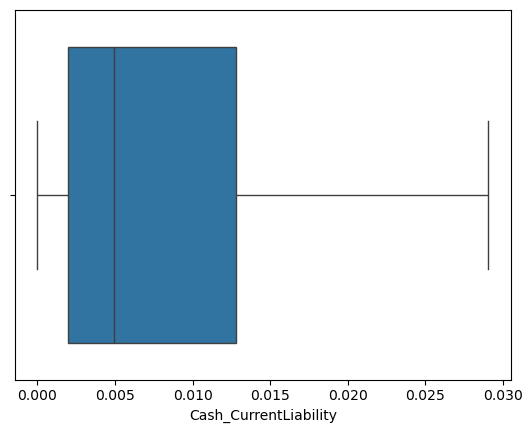

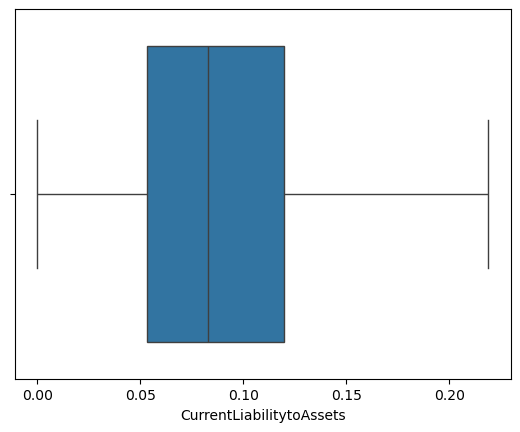

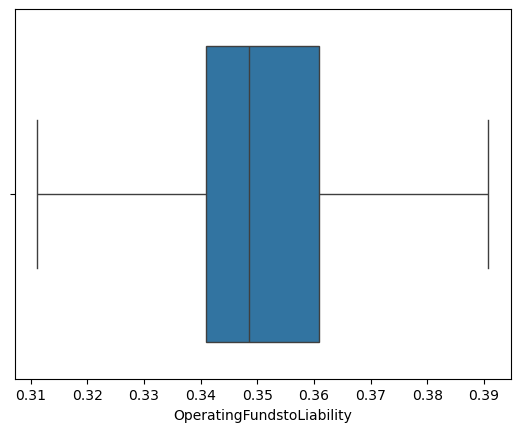

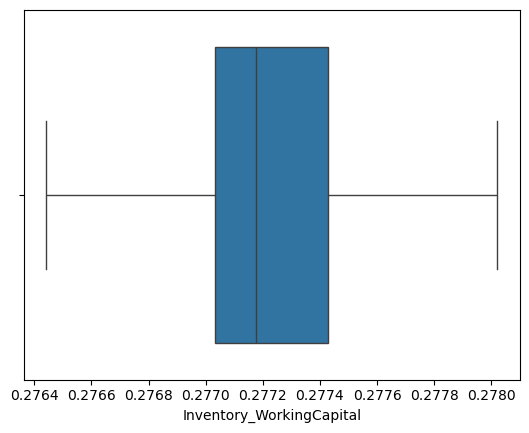

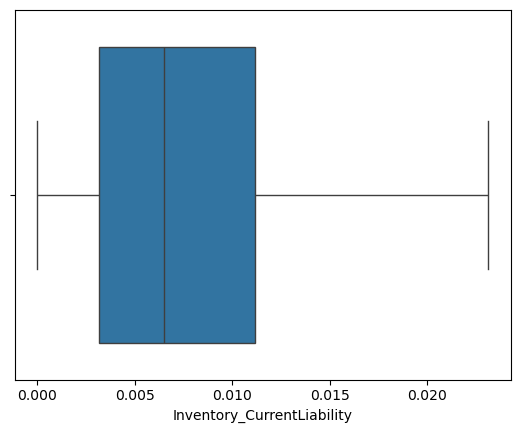

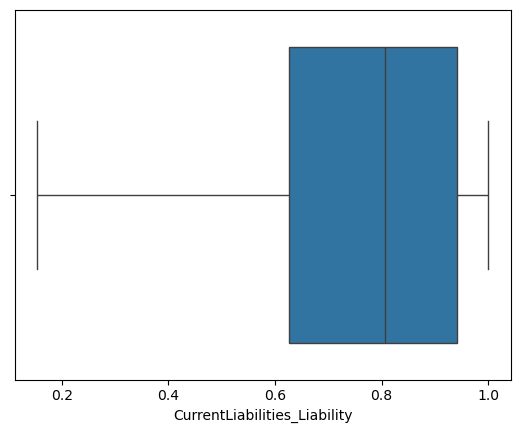

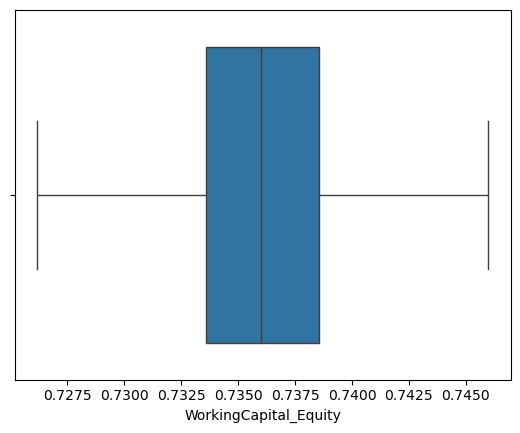

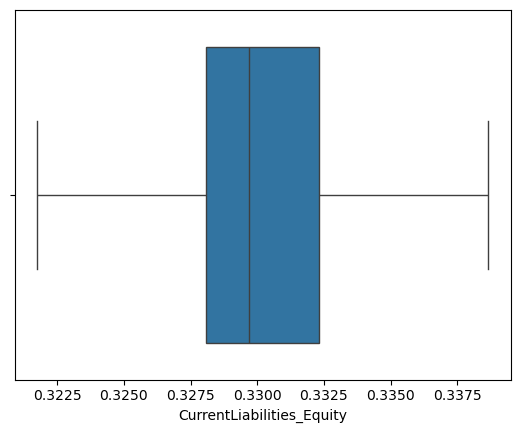

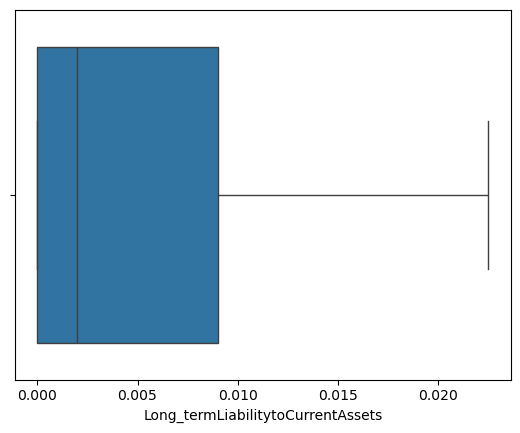

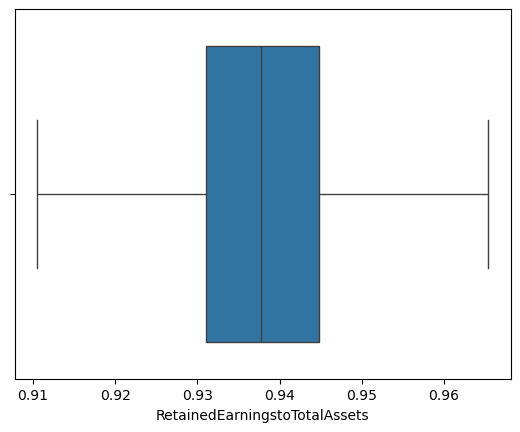

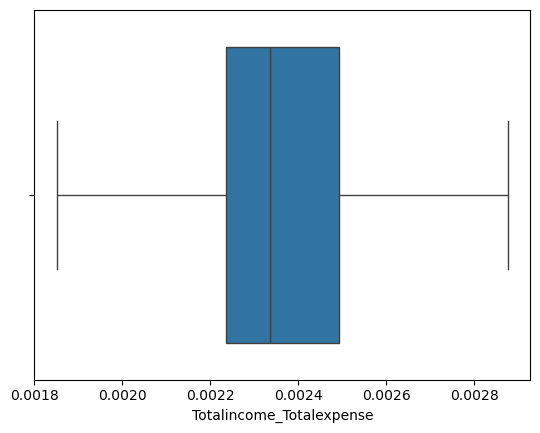

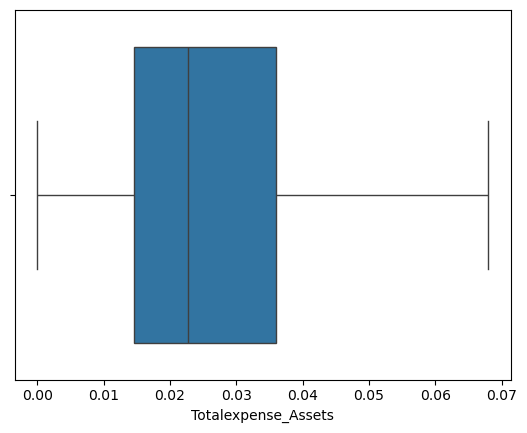

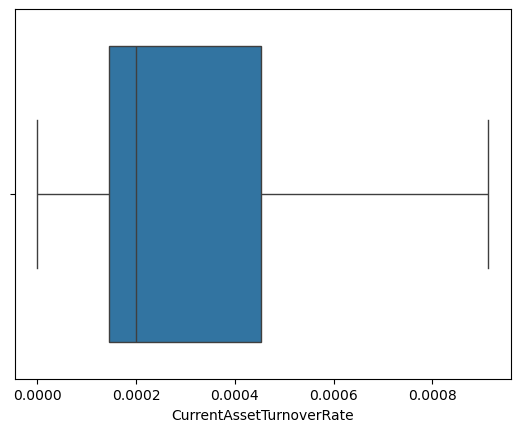

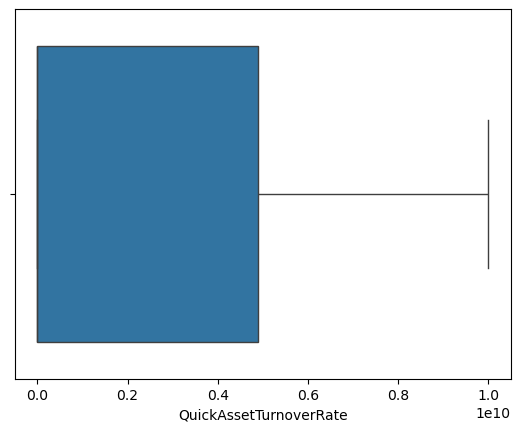

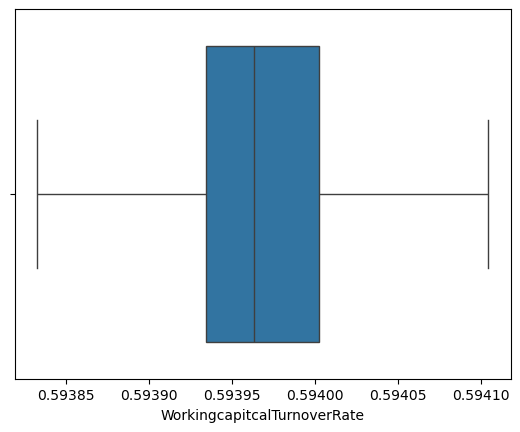

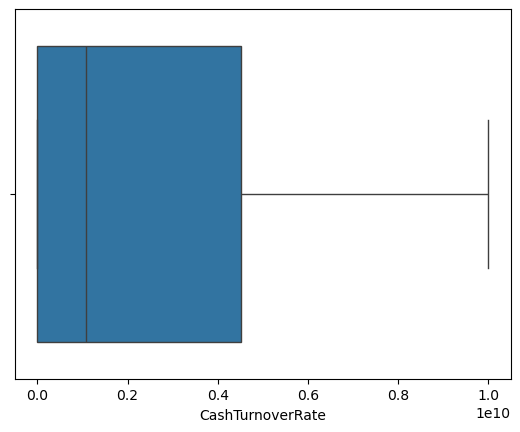

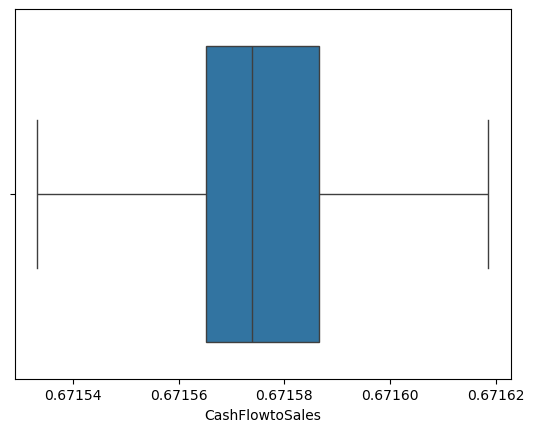

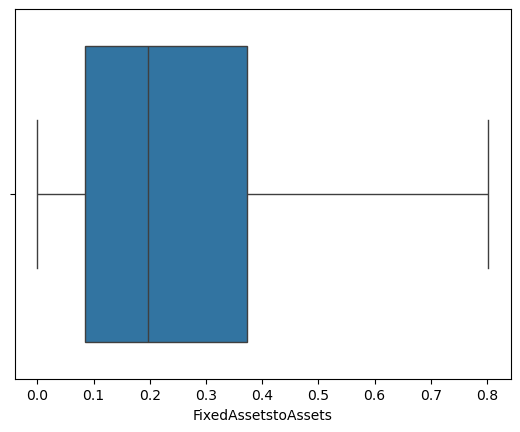

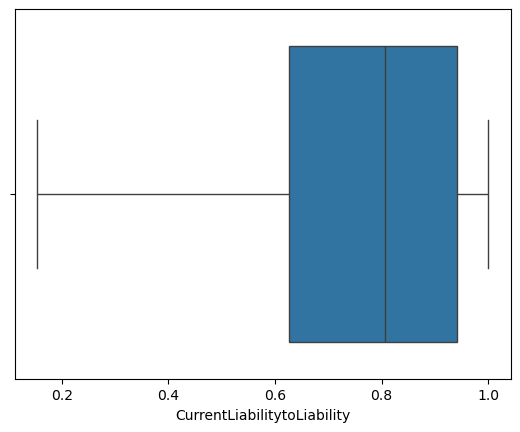

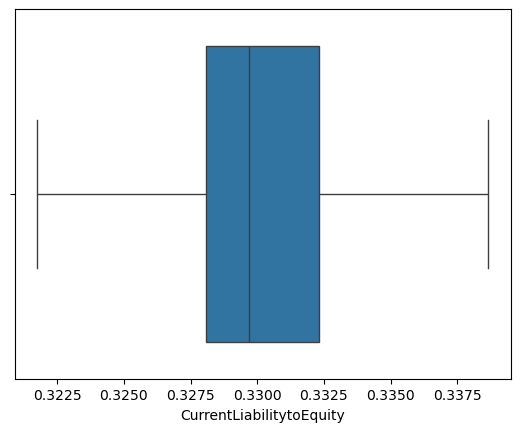

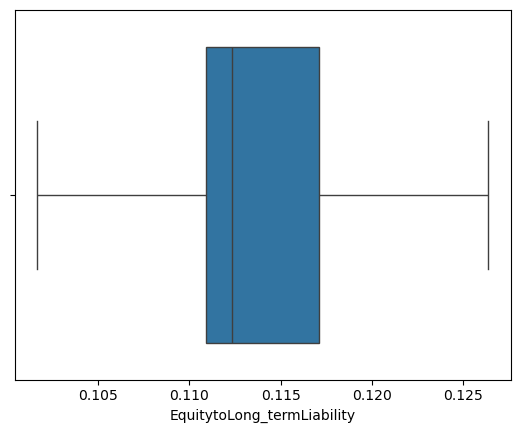

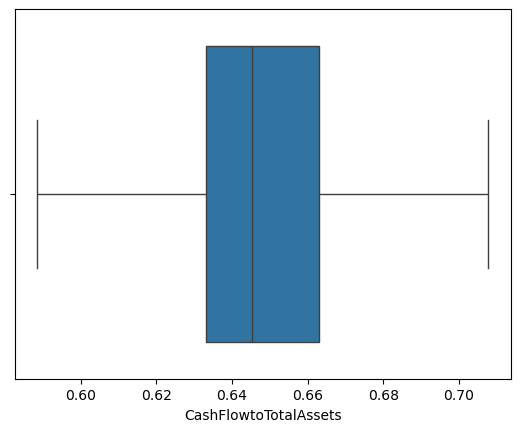

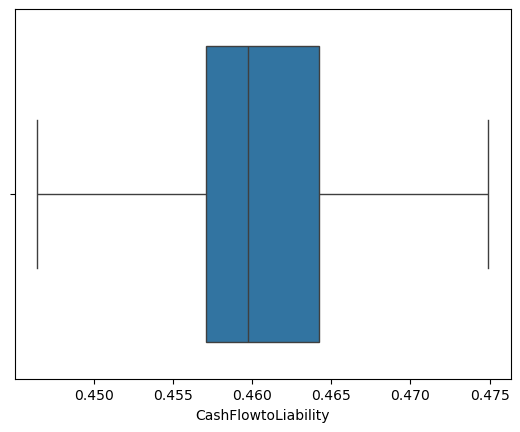

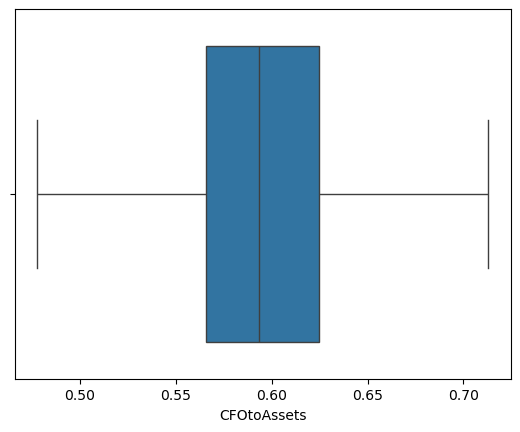

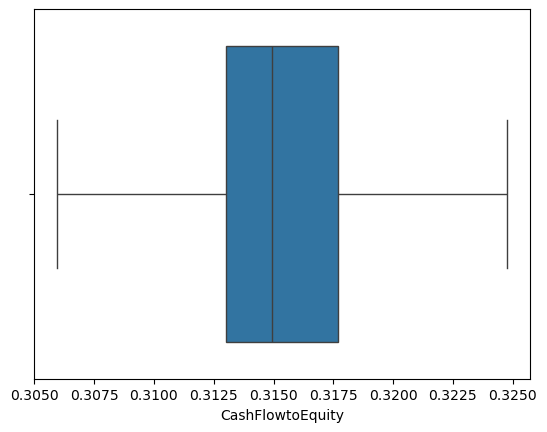

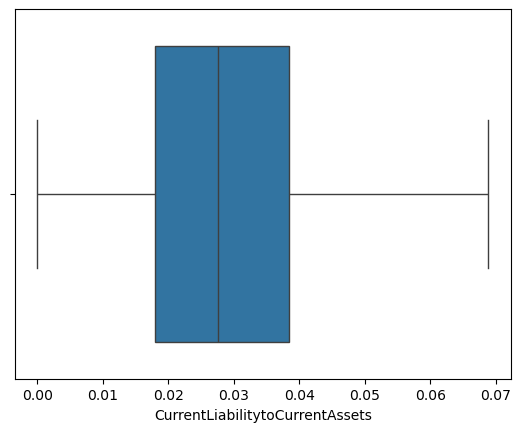

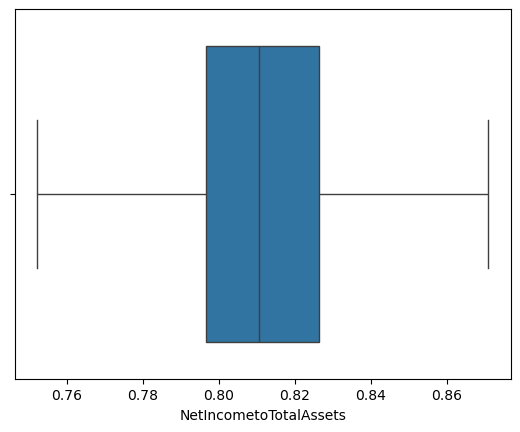

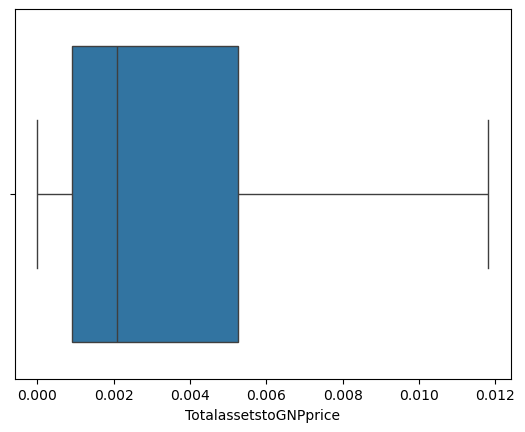

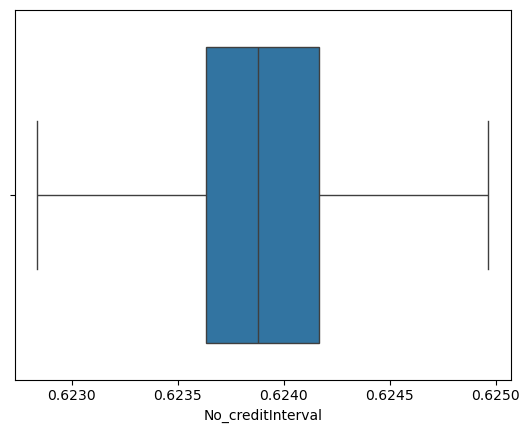

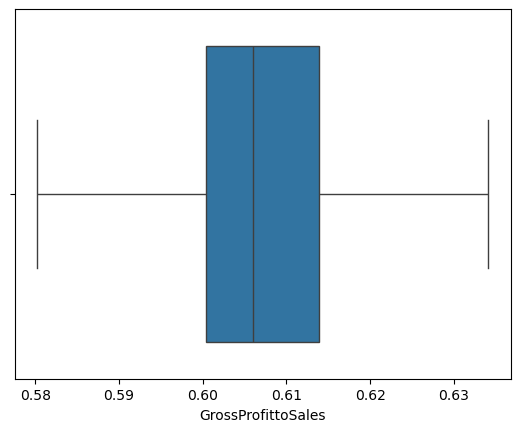

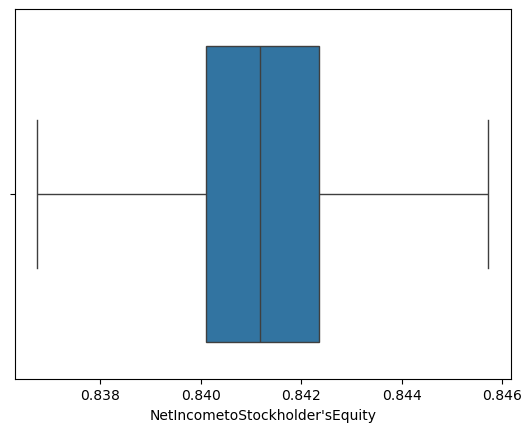

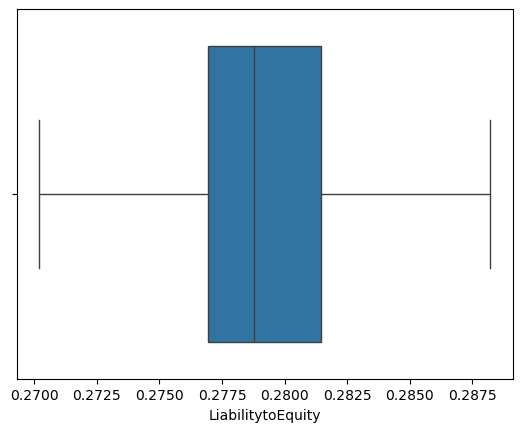

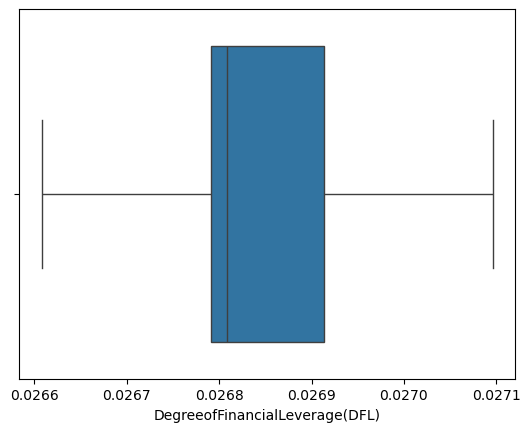

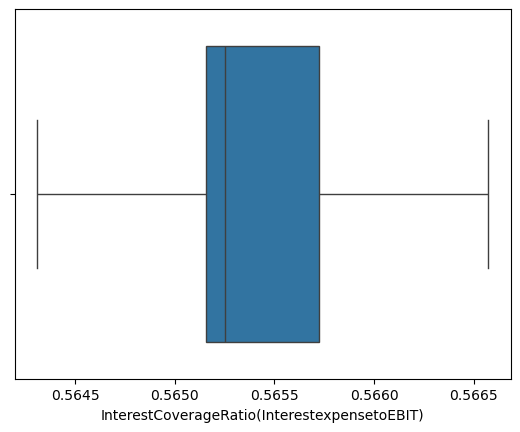

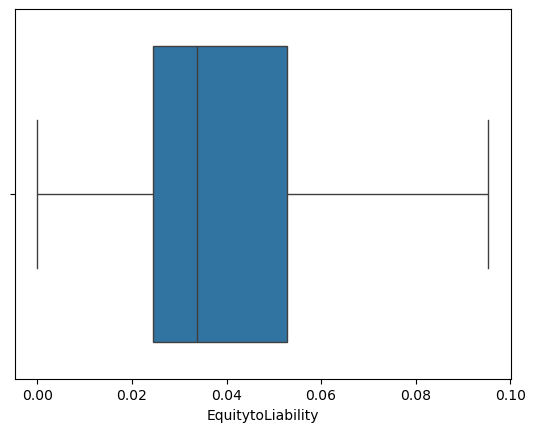

In [19]:
plot_count=0
for col in newdf.columns:
    sns.boxplot(x=newdf[col])
    plt.show()
    plot_count+=1
# Boxplot the columns whoes outlier are removed.

In [20]:
print(plot_count)

93


## 2.Exploratory Data Analysis (EDA):

### 2.1 Generate descriptive statistics.

In [21]:
df.describe().T

count          mean  \
Bankrupt                                           6819.0  3.226280e-02   
ROA(C)beforeinterestanddepreciationbeforeinterest  6819.0  5.051796e-01   
ROA(A)beforeinterestand_peraftertax                6819.0  5.586249e-01   
ROA(B)beforeinterestanddepreciationaftertax        6819.0  5.535887e-01   
OperatingGrossMargin                               6819.0  6.079480e-01   
RealizedSalesGrossMargin                           6819.0  6.079295e-01   
OperatingProfitRate                                6819.0  9.987551e-01   
Pre_taxnetInterestRate                             6819.0  7.971898e-01   
After_taxnetInterestRate                           6819.0  8.090836e-01   
Non_industryincomeandexpenditure_revenue           6819.0  3.036229e-01   
Continuousinterestrate(aftertax)                   6819.0  7.813814e-01   
OperatingExpenseRate                               6819.0  1.995347e+09   
Researchanddevelopmentexpenserate                  6819.0  1.950427e+09   
Cashflowrate                                       6819.0  4.674312e-01   
Interest_bearingdebtinterestrate                   6819.0  1.644801e+07   
Taxrate(A)                                         6819.0  1.150007e-01   
NetValuePerShare(B)                                6819.0  1.906606e-01   
NetValuePerShare(A)                                6819.0  1.906332e-01   
NetValuePerShare(C)                                6819.0  1.906724e-01   
PersistentEPSintheLastFourSeasons                  6819.0  2.288129e-01   
CashFlowPerShare                                   6819.0  3.234819e-01   
RevenuePerShare(Yuan¥)                             6819.0  1.328641e+06   
OperatingProfitPerShare(Yuan¥)                     6819.0  1.090907e-01   
PerShareNetprofitbeforetax(Yuan¥)                  6819.0  1.843606e-01   
RealizedSalesGrossProfitGrowthRate                 6819.0  2.240785e-02   
OperatingProfitGrowthRate                          6819.0  8.479800e-01   
After_taxNetProfitGrowthRate                       6819.0  6.891461e-01   
RegularNetProfitGrowthRate                         6819.0  6.891500e-01   
ContinuousNetProfitGrowthRate                      6819.0  2.176390e-01   
TotalAssetGrowthRate                               6819.0  5.508097e+09   
NetValueGrowthRate                                 6819.0  1.566212e+06   
TotalAssetReturnGrowthRateRatio                    6819.0  2.642475e-01   
CashReinvestment_per                               6819.0  3.796767e-01   
CurrentRatio                                       6819.0  4.032850e+05   
QuickRatio                                         6819.0  8.376595e+06   
InterestExpenseRatio                               6819.0  6.309910e-01   
Totaldebt_Totalnetworth                            6819.0  4.416337e+06   
Debtratio_per                                      6819.0  1.131771e-01   
Networth_Assets                                    6819.0  8.868229e-01   
Long_termfundsuitabilityratio(A)                   6819.0  8.782734e-03   
Borrowingdependency                                6819.0  3.746543e-01   
Contingentliabilities_Networth                     6819.0  5.968277e-03   
Operatingprofit_Paid_incapital                     6819.0  1.089767e-01   
Netprofitbeforetax_Paid_incapital                  6819.0  1.827150e-01   
Inventoryandaccountsreceivable_Netvalue            6819.0  4.024593e-01   
TotalAssetTurnover                                 6819.0  1.416056e-01   
AccountsReceivableTurnover                         6819.0  1.278971e+07   
AverageCollectionDays                              6819.0  9.826221e+06   
InventoryTurnoverRate(times)                       6819.0  2.149106e+09   
FixedAssetsTurnoverFrequency                       6819.0  1.008596e+09   
NetWorthTurnoverRate(times)                        6819.0  3.859505e-02   
Revenueperperson                                   6819.0  2.325854e+06   
Operatingprofitperperson                           6819.0  4.006710e-01   
Al

### 2.2 Visualize feature distributions and target variable.

C:\Users\gopal\AppData\Local\Temp\ipykernel_17052\2662492363.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bankrupt', data=df,  palette='viridis')


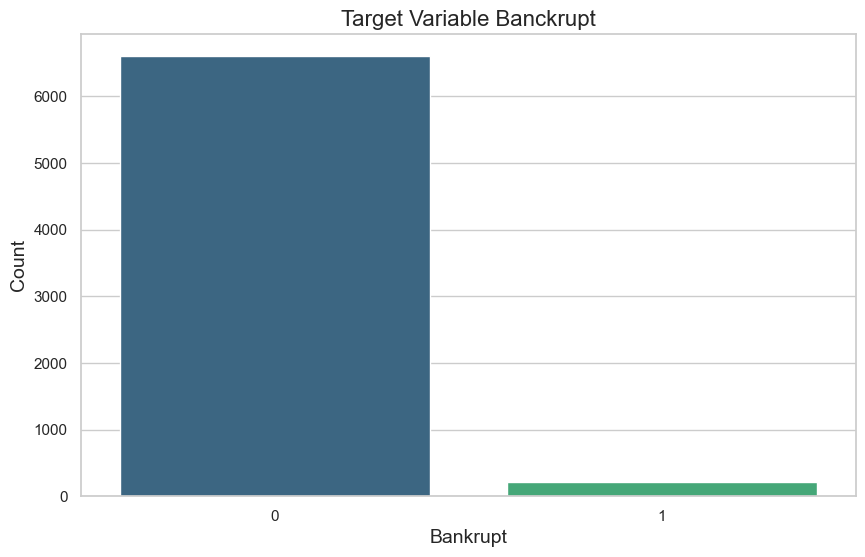

In [22]:
# plotting the targeted variable countplot.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Bankrupt', data=df,  palette='viridis')
plt.title('Target Variable Banckrupt', fontsize=16) 
plt.xlabel('Bankrupt', fontsize=14)
plt.ylabel('Count', fontsize=14) 
plt.xticks(rotation=0)
plt.show()

In [23]:
df['Bankrupt'].value_counts()

Bankrupt
0    6599
1     220
Name: count, dtype: int64

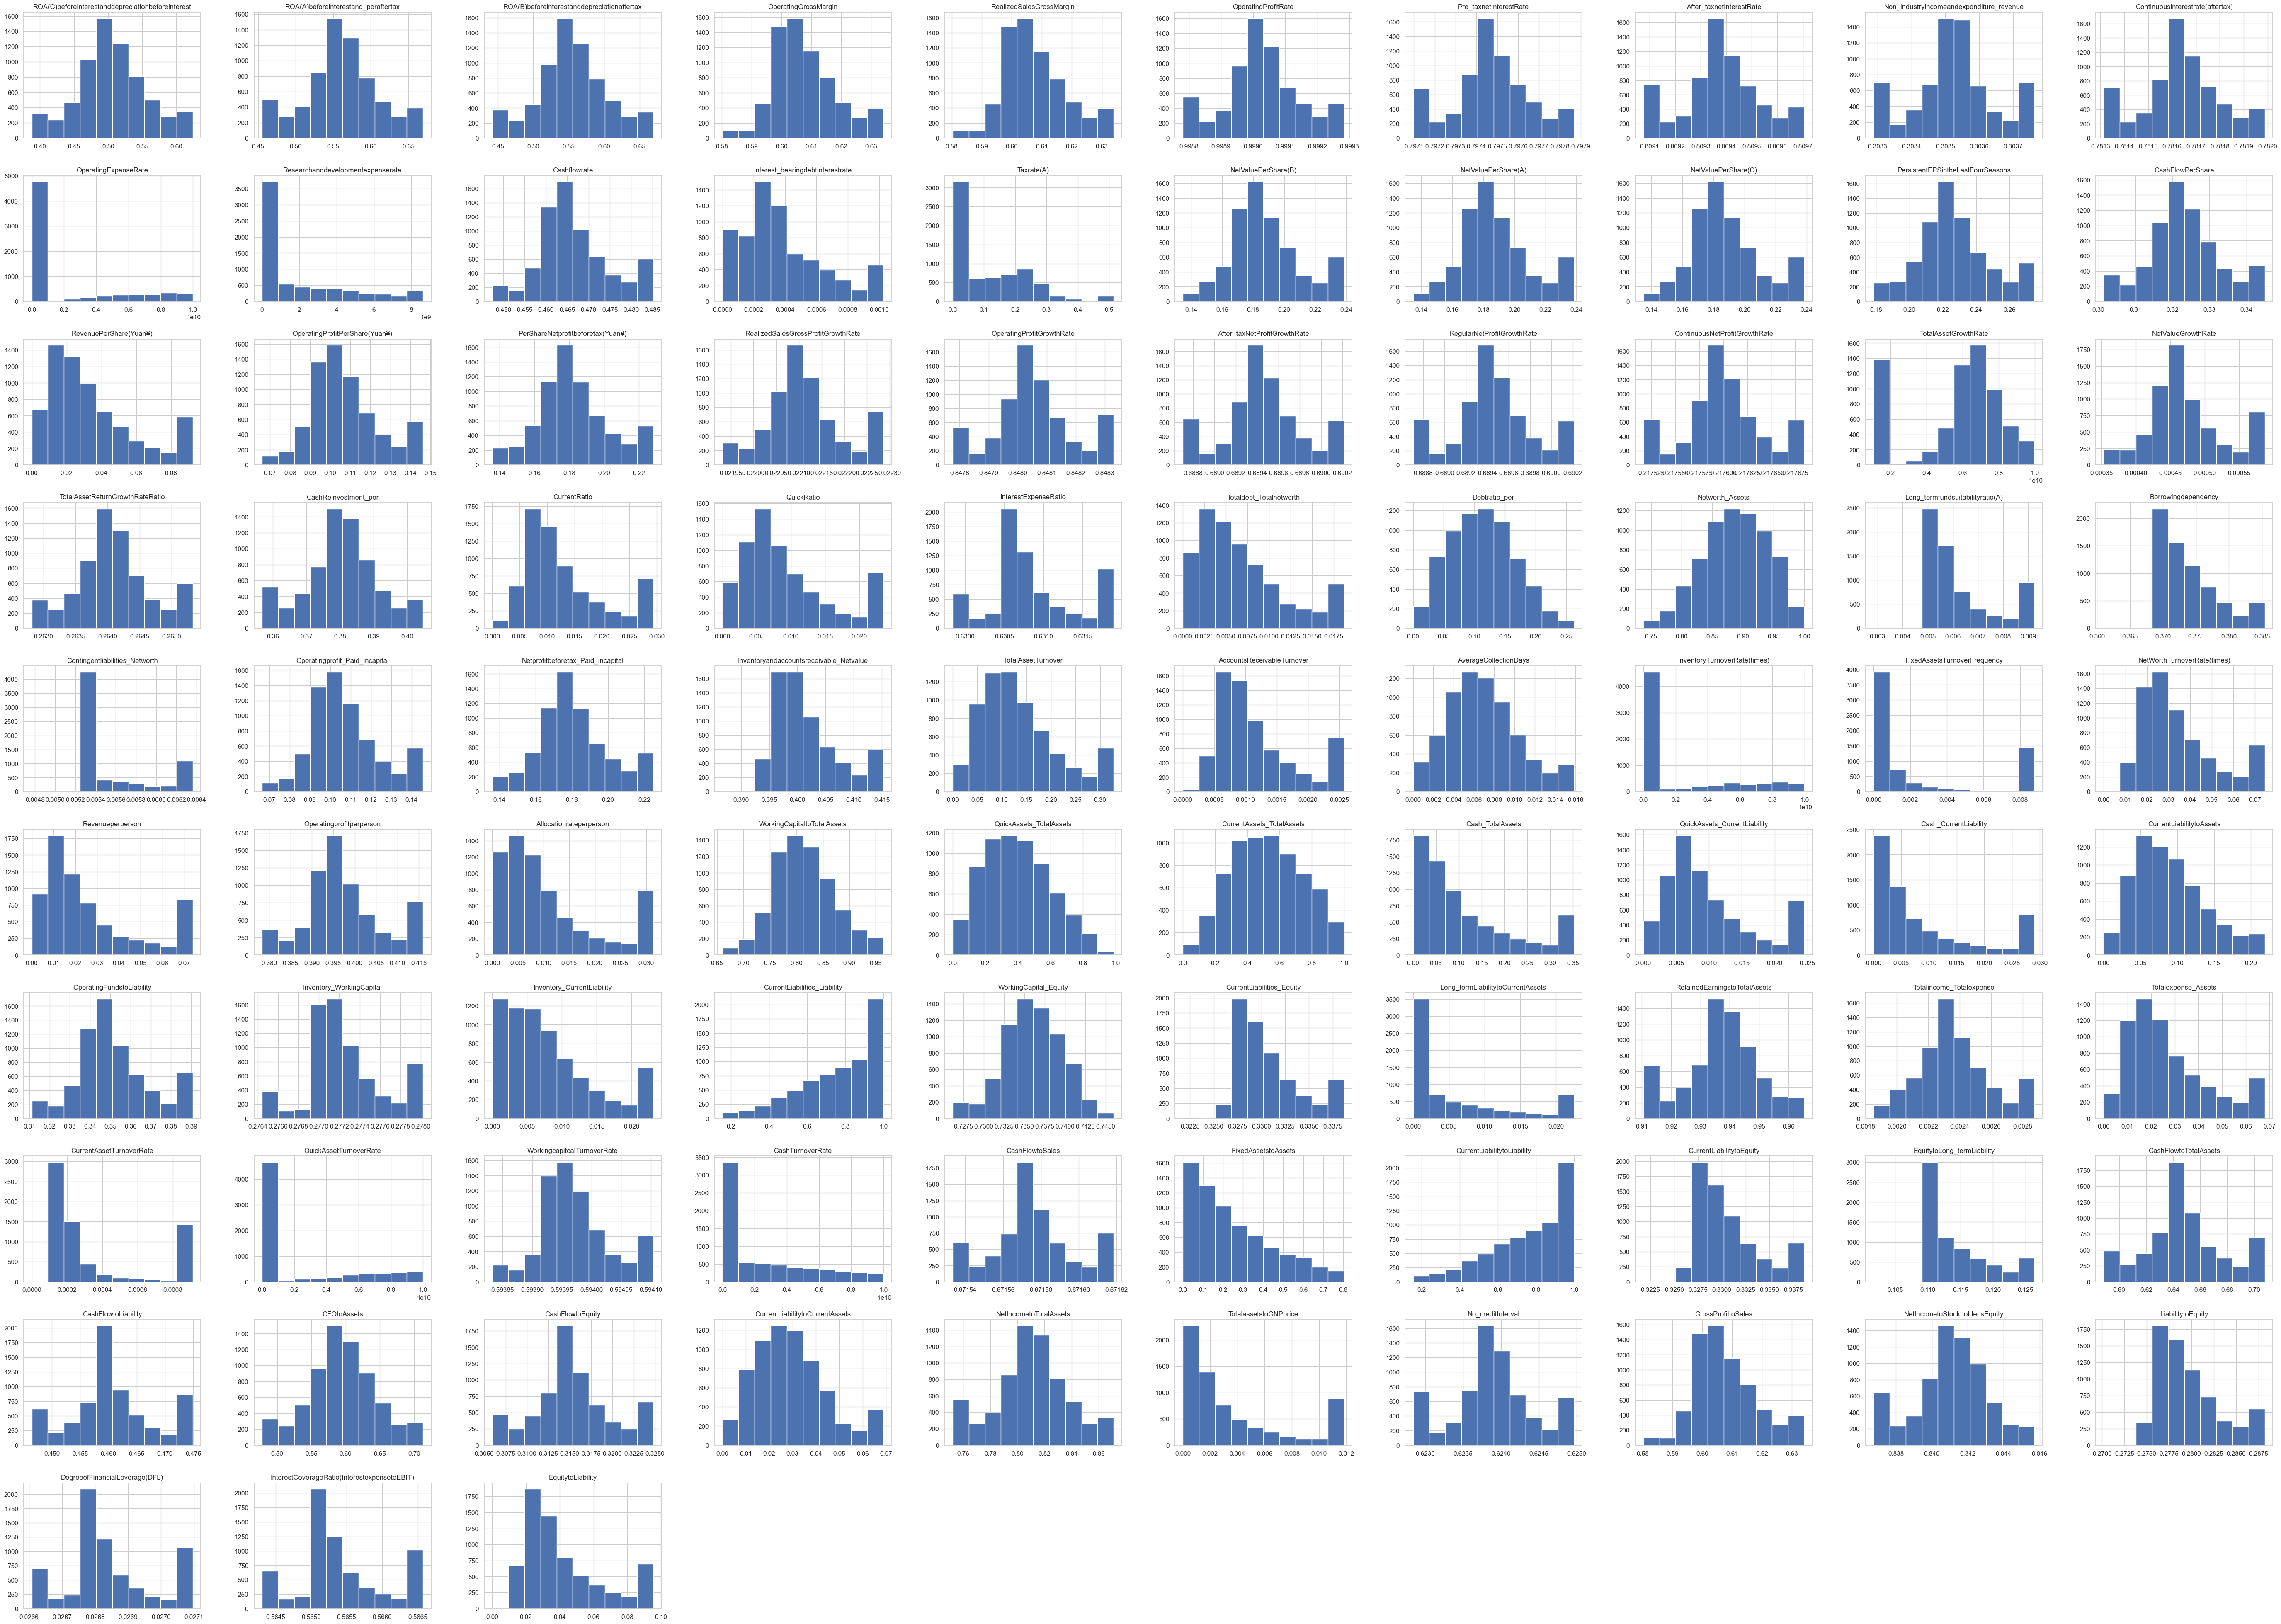

In [24]:
newdf.hist(figsize=(70, 50))
plt.show()

In [102]:
df1=df[['Bankrupt','Liability_AssetsFlag','NetIncomeFlag']]
df1.head()

Bankrupt  Liability_AssetsFlag  NetIncomeFlag
0         1                     0              1
1         1                     0              1
2         1                     0              1
3         1                     0              1
4         1                     0              1

In [78]:
new_df=pd.concat([df1,newdf],axis=1)

In [79]:
new_df.head()

Bankrupt  Liability_AssetsFlag  \
0         1                     0   
1         1                     0   
2         1                     0   
3         1                     0   
4         1                     0   

   ROA(C)beforeinterestanddepreciationbeforeinterest  \
0                                           0.387973   
1                                           0.464291   
2                                           0.426071   
3                                           0.399844   
4                                           0.465022   

   ROA(A)beforeinterestand_peraftertax  \
0                             0.455122   
1                             0.538214   
2                             0.499019   
3                             0.455122   
4                             0.538432   

   ROA(B)beforeinterestanddepreciationaftertax  OperatingGrossMargin  \
0                                     0.442034              0.601457   
1                                     0.516730              0.610235   
2                                     0.472295              0.601450   
3                                     0.457733              0.583541   
4                                     0.522298              0.598783   

   RealizedSalesGrossMargin  OperatingProfitRate  Pre_taxnetInterestRate  \
0                  0.601457             0.998969                0.797096   
1                  0.610235             0.998946                0.797380   
2                  0.601364             0.998857                0.797096   
3                  0.583541             0.998781                0.797096   
4                  0.598783             0.998973                0.797366   

   After_taxnetInterestRate  Non_industryincomeandexpenditure_revenue  \
0                  0.809075                                  0.303288   
1                  0.809301                                  0.303556   
2                  0.809075                                  0.303288   
3                  0.809075                                  0.303350   
4                  0.809304                                  0.303475   

   Continuousinterestrate(aftertax)  OperatingExpenseRate  \
0                          0.781314          1.256969e-04   
1                          0.781506          2.897851e-04   
2                          0.781314          2.361297e-04   
3                          0.781314          1.078888e-04   
4                          0.781550          7.890000e+09   

   Researchanddevelopmentexpenserate  Cashflowrate  \
0                                0.0      0.458143   
1                                0.0      0.461867   
2                         25500000.0      0.458521   
3                                0.0      0.465705   
4                                0.0      0.462746   

   Interest_bearingdebtinterestrate  Taxrate(A)  NetValuePerShare(B)  \
0                          0.000725         0.0             0.147950   
1                          0.000647         0.0             0.182251   
2                          0.000790         0.0             0.177911   
3                          0.000449         0.0             0.154187   
4                          0.000686         0.0             0.167502   

   NetValuePerShare(A)  NetValuePerShare(C)  \
0             0.147950             0.147950   
1             0.182251             0.182251   
2             0.177911             0.193713   
3             0.154187             0.154187   
4             0.167502             0.167502   

   PersistentEPSintheLastFourSeasons  CashFlowPerShare  \
0                           0.178548          0.311664   
1                           0.208944          0.318137   
2                           0.180581          0.307102   
3                           0.193722          0.321674   
4                           0.212537          0.319162   

   RevenuePerShare(Yuan¥)  OperatingProfitPerShare(Yuan¥)  \
0                0.017560                  

### 2.3 Analyze relationships between features and the target variable.

In [80]:
# Compute correlations
correlations = new_df.corr()['Bankrupt'].sort_values(ascending=False)

# Display correlations for features
print(correlations)

Bankrupt                                             1.000000
Borrowingdependency                                  0.278367
Totaldebt_Totalnetworth                              0.272914
Debtratio_per                                        0.246535
LiabilitytoEquity                                    0.246176
CurrentLiabilitytoCurrentAssets                      0.229231
CurrentLiabilities_Equity                            0.216619
CurrentLiabilitytoEquity                             0.216619
CurrentLiabilitytoAssets                             0.193564
EquitytoLong_termLiability                           0.140383
Liability_AssetsFlag                                 0.139212
Allocationrateperperson                              0.113516
Inventoryandaccountsreceivable_Netvalue              0.104791
Totalexpense_Assets                                  0.102058
Interest_bearingdebtinterestrate                     0.097928
Long_termLiabilitytoCurrentAssets                    0.092509
FixedAss

In [81]:
correlation_matrix = new_df.corr()

In [82]:
new_df.corr()

Bankrupt  \
Bankrupt                                           1.000000   
Liability_AssetsFlag                               0.139212   
ROA(C)beforeinterestanddepreciationbeforeinterest -0.239543   
ROA(A)beforeinterestand_peraftertax               -0.239500   
ROA(B)beforeinterestanddepreciationaftertax       -0.241993   
OperatingGrossMargin                              -0.140042   
RealizedSalesGrossMargin                          -0.139272   
OperatingProfitRate                               -0.193856   
Pre_taxnetInterestRate                            -0.238036   
After_taxnetInterestRate                          -0.239484   
Non_industryincomeandexpenditure_revenue          -0.214507   
Continuousinterestrate(aftertax)                  -0.248585   
OperatingExpenseRate                              -0.006083   
Researchanddevelopmentexpenserate                 -0.024764   
Cashflowrate                                      -0.120201   
Interest_bearingdebtinterestrate                   0.097928   
Taxrate(A)                                        -0.121220   
NetValuePerShare(B)                               -0.214143   
NetValuePerShare(A)                               -0.213725   
NetValuePerShare(C)                               -0.212643   
PersistentEPSintheLastFourSeasons                 -0.256159   
CashFlowPerShare                                  -0.115611   
RevenuePerShare(Yuan¥)                            -0.067166   
OperatingProfitPerShare(Yuan¥)                    -0.190741   
PerShareNetprofitbeforetax(Yuan¥)                 -0.246001   
RealizedSalesGrossProfitGrowthRate                -0.096151   
OperatingProfitGrowthRate                         -0.107083   
After_taxNetProfitGrowthRate                      -0.146503   
RegularNetProfitGrowthRate                        -0.143949   
ContinuousNetProfitGrowthRate                     -0.141603   
TotalAssetGrowthRate                              -0.053331   
NetValueGrowthRate                                -0.216739   
TotalAssetReturnGrowthRateRatio                   -0.114126   
CashReinvestment_per                              -0.088168   
CurrentRatio                                      -0.154300   
QuickRatio                                        -0.158537   
InterestExpenseRatio                              -0.109211   
Totaldebt_Totalnetworth                            0.272914   
Debtratio_per                                      0.246535   
Networth_Assets                                   -0.246535   
Long_termfundsuitabilityratio(A)                  -0.078714   
Borrowingdependency                                0.278367   
Contingentliabilities_Networth                     0.033151   
Operatingprofit_Paid_incapital                    -0.190264   
Netprofitbeforetax_Paid_incapital                 -0.247467   
Inventoryandaccountsreceivable_Netvalue            0.104791   
TotalAssetTurnover                                -0.078190   
AccountsReceivableTurnover                        -0.014209   
AverageCollectionDays                              0.042544   
InventoryTurnoverRate(times)                      -0.001376   
FixedAssetsTurnoverFrequency                       0.077481   
NetWorthTurnoverRate(times)                        0.018950   
Revenueperperson                                   0.025917   
Operatingprofitperperson                          -0.180514   
Allocationrateperperson                            0.113516   
WorkingCapitaltoTotalAssets                       -0.193536   
QuickAssets_TotalAssets                           -0.086383   
CurrentAssets_TotalAssets                         -0.044823   
Cash_TotalAssets                                  -0.115155   
QuickAssets_CurrentLiability                      -0.151713   
Cash_CurrentLiability                             -0.088781   
CurrentLiabilitytoAssets                           0.193564   
OperatingFundstoLiability                         -0.119318   
Inventory_WorkingCa

## 3. Hypothesis Testing:

In [83]:
# One Way Anova Test
# Null Hypotysis [H0] LiabilitytoEquity is not influence on Bankrupt.
# Alternative Hypothesis (H1): The LiabilitytoEquity has a significant influence on the bankrupt.

df_Ano = new_df[['Bankrupt','LiabilitytoEquity']]
df_Ano.head(10)

Bankrupt  LiabilitytoEquity
0         1           0.288207
1         1           0.283846
2         1           0.288207
3         1           0.281721
4         1           0.278514
5         1           0.285087
6         0           0.288207
7         0           0.278607
8         0           0.276423
9         0           0.279388

In [84]:
mod1 = ols('LiabilitytoEquity ~ Bankrupt', data=df_Ano).fit() # here we are checking that LiabilitytoEquity is depend on Bankrupt

In [85]:
table = sm.stats.anova_lm(mod1)

In [86]:
table = sm.stats.anova_lm(mod1)

In [87]:
print(table)  # F(439.780814) this is the singnificant value, PR(>F)(1.121240e-94) this is the p-value

              df    sum_sq   mean_sq           F        PR(>F)
Bankrupt     1.0  0.005255  0.005255  439.780814  1.121240e-94
Residual  6817.0  0.081452  0.000012         NaN           NaN


In [88]:
res = pairwise_tukeyhsd(df_Ano.LiabilitytoEquity, df_Ano.Bankrupt)

In [89]:
print(res)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    0.005   0.0 0.0045 0.0054   True
-------------------------------------------------


## Feature Engineering and Selection:

In [127]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [128]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### Create new features to enhance predictive power.

In [129]:
# Separate the features and the target variable
X = df.drop(columns=['Bankrupt','NetIncomeFlag'])  # Features
y = df['Bankrupt']  # Target variable

# Splitting data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

### Use dimensionality reduction techniques if necessary.

In [130]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data if dealing with imbalanced classes
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

### Select relevant features using methods like RFE or feature importance.

In [131]:
# Feature selection using RFE
num_features_to_select = 47  # Adjust this number based on your dataset size and complexity
rfe = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=num_features_to_select)
rfe.fit(X_train_res, y_train_res)

# Get selected feature indices
selected_indices = rfe.get_support(indices=True)

In [132]:
# Feature selection using RFE
num_features_to_select = 47  # Adjust this number based on your dataset size and complexity
rfe = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=num_features_to_select)
rfe.fit(X_train_res, y_train_res)

# Get selected feature indices
selected_indices = rfe.get_support(indices=True)

LogisticRegression(max_iter=1000, random_state=42)

In [133]:
# Get selected feature indices
selected_indices = rfe.get_support(indices=True)

# Make predictions on the training set
y_pred_train_selected = model_selected.predict(X_train_selected)

## Modeling:

### Split the data into training and testing sets.


Model Evaluation Metrics on Test Data with selected features:
Accuracy: 0.8680351906158358
Confusion Matrix:
 [[1443  215]
 [  10   37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      1658
           1       0.15      0.79      0.25        47

    accuracy                           0.87      1705
   macro avg       0.57      0.83      0.59      1705
weighted avg       0.97      0.87      0.91      1705



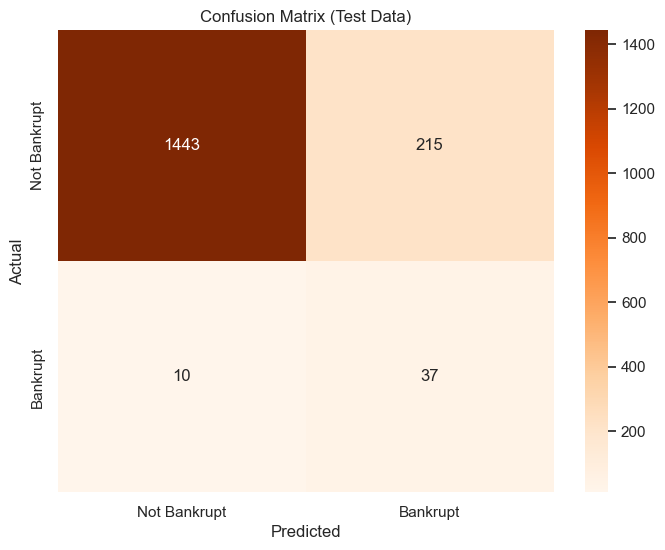

In [134]:
y_pred_test_selected = model_selected.predict(X_test_selected)

# Evaluate the model with selected features on test data
print("\nModel Evaluation Metrics on Test Data with selected features:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_selected))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_selected))
print("Classification Report:\n", classification_report(y_test, y_pred_test_selected))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test_selected)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Bankrupt', 'Bankrupt'], yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Accuracy of the model is  0.8680351906158358

### Evaluate model performance using appropriate metrics.


Model Evaluation Metrics on Training Data with selected features:
Accuracy: 0.8995142683667274
Confusion Matrix:
 [[4330  611]
 [ 382 4559]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      4941
           1       0.88      0.92      0.90      4941

    accuracy                           0.90      9882
   macro avg       0.90      0.90      0.90      9882
weighted avg       0.90      0.90      0.90      9882



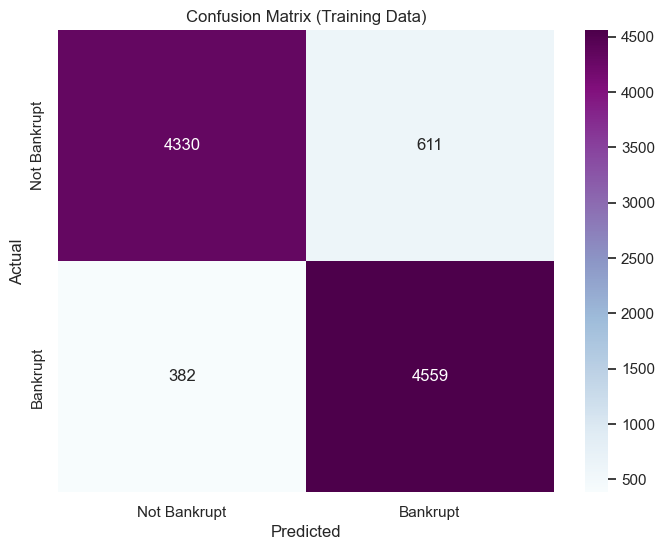

In [135]:
# Evaluate the model with selected features on training data
print("\nModel Evaluation Metrics on Training Data with selected features:")
print("Accuracy:", accuracy_score(y_train_res, y_pred_train_selected))
print("Confusion Matrix:\n", confusion_matrix(y_train_res, y_pred_train_selected))
print("Classification Report:\n", classification_report(y_train_res, y_pred_train_selected))

# Plot confusion matrix
cm = confusion_matrix(y_train_res, y_pred_train_selected)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=['Not Bankrupt', 'Bankrupt'], yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training Data)')
plt.show()

## Model Interpretation and Insights:

### Interpret model coefficients to understand feature impact.

### Logistic Regression

In [138]:
import statsmodels.api as sm

In [139]:
# Null Hypotysis [H0] selected_features is not influence on Bankrupt.
# Alternative Hypothesis (H1): The selected_features has a significant influence on the bankrupt.


selected_features = ['Long_termfundsuitabilityratio(A)',
       'Borrowingdependency', 'Contingentliabilities_Networth',
       'Operatingprofit_Paid_incapital', 'Netprofitbeforetax_Paid_incapital',
       'Inventoryandaccountsreceivable_Netvalue', 'TotalAssetTurnover',
       'AccountsReceivableTurnover', 'AverageCollectionDays',
       'InventoryTurnoverRate(times)', 'FixedAssetsTurnoverFrequency'
]
X = new_df[selected_features]
y = new_df['Bankrupt']

#

# Split the data into training and test sets
#X_train_selected, X_test, y_train_res, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (for intercept)
X_train_selected = sm.add_constant(X_train_selected,prepend=False)
X_test_selected = sm.add_constant(X_test_selected,prepend=False)

# Train a logistic regression model using statsmodels
logit_model = sm.Logit(y_train_res, X_train_selected)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Make predictions on the test set
y_pred_prob = result.predict(X_test_selected)
y_pred = (y_pred_prob > 0.5).astype(int)


conf_matrix = confusion_matrix(y_test_res, y_pred)

print(conf_matrix)

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

### Summarize key insights and discuss implications for financial risk management.